## Importy

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from skimage.morphology import skeletonize
import glob
import os
from tqdm import tqdm
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from torch import optim
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 

In [ ]:
from .mscnet import *

In [ ]:
def one_hot(labels, num_classes, device = None, dtype  = None, eps= 1e-6,):
    shape = labels.shape
    one_hot = torch.zeros((shape[0], num_classes) + shape[1:], device=device, dtype=dtype)

    return one_hot.scatter_(1, labels.unsqueeze(1), 1.0) + eps

## Funkcja straty

In [ ]:
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Data Loaders

In [ ]:
class DataLoaderSTARE(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None):
        super(DataLoaderSTARE, self).__init__()
        self.image_files = glob.glob(os.path.join(folder_path,'images','*.png')) # .png
        self.mask_segmentation1_files = []
        self.mask_segmentation2_files = []
        self.mask_centerline_files = []
        self.transform = transform
        for img_path in self.image_files:
             self.mask_segmentation1_files.append(os.path.join(folder_path,'mask_segmentation1', os.path.basename(img_path)))
        for img_path in self.image_files:
             self.mask_segmentation2_files.append(os.path.join(folder_path,'mask_segmentation2', os.path.basename(img_path)))
        for img_path in self.image_files:
             self.mask_centerline_files.append(os.path.join(folder_path,'mask_centerline', os.path.basename(img_path)))

    def __getitem__(self, index):
            image_path = self.image_files[index]
            mask_segmentation1_path = self.mask_segmentation1_files[index]
            mask_segmentation2_path = self.mask_segmentation2_files[index]
            mask_centerline_path = self.mask_centerline_files[index]

            image = Image.open(image_path)
            mask_segmentation1 = Image.open(mask_segmentation1_path)
            mask_segmentation2 = Image.open(mask_segmentation2_path)
            mask_centerline = Image.open(mask_centerline_path)

            resize = torchvision.transforms.Resize(size=(624, 624)) # should be 624x624

            img = resize((torchvision.transforms.functional.equalize(torch.from_numpy(numpy.asarray(image, dtype="uint8")).permute(2, 0, 1)).float()/255)[(1,), :, :])

            mask_seg1 = resize(torch.from_numpy(numpy.asarray(mask_segmentation1)/255).float()[None, :])
            mask_seg2 = resize(1-torch.from_numpy(numpy.asarray(mask_segmentation2)/255).float()[None, :])
            mask_center = resize(torch.from_numpy(numpy.asarray(mask_centerline)/255).float()[None, :])


            return img, mask_seg1, mask_seg2, mask_center

    def __len__(self):
        return len(self.image_files)


class DataLoaderCHASE(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None):
        super(DataLoaderCHASE, self).__init__()
        self.image_files = glob.glob(os.path.join(folder_path,'images','*.png')) # .png
        self.mask_segmentation1_files = []
        self.mask_segmentation2_files = []
        self.mask_centerline_files = []
        self.transform = transform
        for img_path in self.image_files:
             self.mask_segmentation1_files.append(os.path.join(folder_path,'mask_segmentation1', os.path.basename(img_path)))
        for img_path in self.image_files:
             self.mask_segmentation2_files.append(os.path.join(folder_path,'mask_segmentation2', os.path.basename(img_path)))
        for img_path in self.image_files:
             self.mask_centerline_files.append(os.path.join(folder_path,'mask_centerline', os.path.basename(img_path)))

    def __getitem__(self, index):
            image_path = self.image_files[index]
            mask_segmentation1_path = self.mask_segmentation1_files[index]
            mask_segmentation2_path = self.mask_segmentation2_files[index]
            mask_centerline_path = self.mask_centerline_files[index]

            image = Image.open(image_path)
            mask_segmentation1 = Image.open(mask_segmentation1_path)
            mask_segmentation2 = Image.open(mask_segmentation2_path)
            mask_centerline = Image.open(mask_centerline_path)

            resize = torchvision.transforms.Resize(size=(960, 960)) # should be 624x624

            img = resize((torchvision.transforms.functional.equalize(torch.from_numpy(numpy.asarray(image, dtype="uint8")).permute(2, 0, 1)).float()/255)[(1,), :, :])

            mask_seg1 = resize(torch.from_numpy(numpy.asarray(mask_segmentation1)/255).float()[None, :])
            mask_seg2 = resize(1-torch.from_numpy(numpy.asarray(mask_segmentation2)/255).float()[None, :])
            mask_center = resize(torch.from_numpy(numpy.asarray(mask_centerline)/255).float()[None, :])


            return img, mask_seg1, mask_seg2, mask_center

    def __len__(self):
        return len(self.image_files)

class DataLoaderDRIVE(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None):
        super(DataLoaderDRIVE, self).__init__()
        self.image_files = glob.glob(os.path.join(folder_path,'images','*.png')) # .png
        self.mask_segmentation1_files = []
        self.mask_segmentation2_files = []
        self.mask_centerline_files = []
        self.transform = transform
        for img_path in self.image_files:
             self.mask_segmentation1_files.append(os.path.join(folder_path,'mask_segmentation1', os.path.basename(img_path)))
        for img_path in self.image_files:
             self.mask_segmentation2_files.append(os.path.join(folder_path,'mask_segmentation2', os.path.basename(img_path)))
        for img_path in self.image_files:
             self.mask_centerline_files.append(os.path.join(folder_path,'mask_centerline', os.path.basename(img_path)))

    def __getitem__(self, index):
            image_path = self.image_files[index]
            mask_segmentation1_path = self.mask_segmentation1_files[index]
            mask_segmentation2_path = self.mask_segmentation2_files[index]
            mask_centerline_path = self.mask_centerline_files[index]

            image = Image.open(image_path)
            mask_segmentation1 = Image.open(mask_segmentation1_path)
            mask_segmentation2 = Image.open(mask_segmentation2_path)
            mask_centerline = Image.open(mask_centerline_path)

            resize = torchvision.transforms.Resize(size=(576, 576))

            img = resize((torchvision.transforms.functional.equalize(torch.from_numpy(numpy.asarray(image, dtype="uint8")).permute(2, 0, 1)).float()/255)[(1,), :, :])

            mask_seg1 = resize(torch.from_numpy(numpy.asarray(mask_segmentation1)/255).float()[None, :])
            mask_seg2 = resize(1-torch.from_numpy(numpy.asarray(mask_segmentation2)/255).float()[None, :])
            mask_center = resize(torch.from_numpy(numpy.asarray(mask_centerline)/255).float()[None, :])


            return img, mask_seg1, mask_seg2, mask_center

    def __len__(self):
        return len(self.image_files)

In [ ]:
def binary_mapping(x, threshold=0.62):
  return numpy.array((x > threshold).astype(int))

## Metryki

In [ ]:
def accuracy(output, target):
  output = binary_mapping(output)
  target = binary_mapping(target)
  TP = numpy.sum(numpy.logical_and(output == 1, target == 1))
  TN = numpy.sum(numpy.logical_and(output  == 0, target == 0))
  FP = numpy.sum(numpy.logical_and(output  == 1, target == 0))
  FN = numpy.sum(numpy.logical_and(output == 0, target == 1))
  return (TP + TN)/ (TP + FP + TN + FN)

def SE(output, target):
  output = binary_mapping(output)
  target = binary_mapping(target)
  TP = numpy.sum(numpy.logical_and(output == 1, target == 1))
  FN = numpy.sum(numpy.logical_and(output == 0, target == 1))
  return TP/(TP + FN)

def SP(output, target):
  output = binary_mapping(output)
  target = binary_mapping(target)
  TN = numpy.sum(numpy.logical_and(output  == 0, target == 0))
  TP = numpy.sum(numpy.logical_and(output == 1, target == 1))
  FP = numpy.sum(numpy.logical_and(output  == 1, target == 0))
  return TN/ (TN + FP)


def AUC(output, target):
  output = binary_mapping(output).ravel()
  target = binary_mapping(target).ravel()

  fpr, tpr, _ = roc_curve(target, output)
  return auc(fpr,tpr)



## Trenowanie sieci



### STARE custom loss

In [ ]:
## STARE, custom loss

n_epoch = 100

train_losses = []
eval_losses = []

net_custom_loss_stare = MSCNet(n_channels = 1, n_classes = 1)
net_custom_loss_stare.to(device)

dataset = DataLoaderSTARE("data/stare")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

# net_custom_loss_stare.load_state_dict(torch.load("stare_custom_loss_stare_100.pth"))

optimizer = optim.Adam(net_custom_loss_stare.parameters(), lr = 1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.9)


def train(epoch):
  running_loss = 0.0
  net_custom_loss_stare.train()

  for (image, mask_seg1, mask_seg2, mask_center) in tqdm(train_loader):
    image = image.to(device)
    mask_seg1 = mask_seg1.to(device)
    mask_seg2 = mask_seg2.to(device)
    mask_center = mask_center.to(device)

    optimizer.zero_grad()
    output_top, output_bot = net_custom_loss_stare(image)


    criterion = CustomLoss(0.2, 0.5, 0.1, threshold=0.63)
    loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1), torch.squeeze(output_bot), torch.squeeze(mask_center))

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  
def test(epoch):
  running_loss = 0.0

  net_custom_loss_stare.eval()  

  with torch.no_grad():
    for (image, mask_seg1, mask_seg2, mask_center) in tqdm(test_loader):
      image = image.to(device)
      mask_seg1 = mask_seg1.to(device)
      mask_seg2 = mask_seg2.to(device)
      mask_center = mask_center.to(device)
      
      output_top, output_bot = net_custom_loss_stare(image)

      criterion = CustomLoss(0.2, 0.5, 0.1, threshold=0.63)
      loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1), torch.squeeze(output_bot), torch.squeeze(mask_center))

      running_loss+=loss.item()
      
  
  test_loss=running_loss/len(test_loader)

  eval_losses.append(test_loss)



for epoch in range(n_epoch+1):
  train(epoch)
  test(epoch)
  scheduler.step(eval_losses[-1])
  print(f"Epoch {epoch+1}, training_loss = {train_losses[-1]:.6f}, val_loss = {eval_losses[-1]:.6f}")
  if epoch % 50 == 0:
    torch.save(net_custom_loss_stare.state_dict(), f'stare_custom_loss_stare_{epoch}.pth')



### testowanie wyników

--------------------------------------------


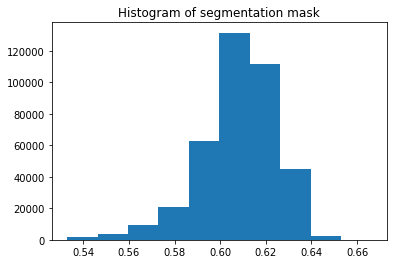

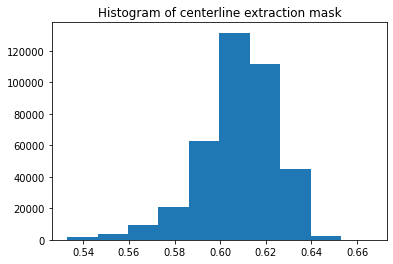

Metrics for segmentation: 
SE =  0.19279483809296213
SP =  0.7776425962348974
accuracy =  0.7273612138395792
AUC =  0.4852187171639297
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


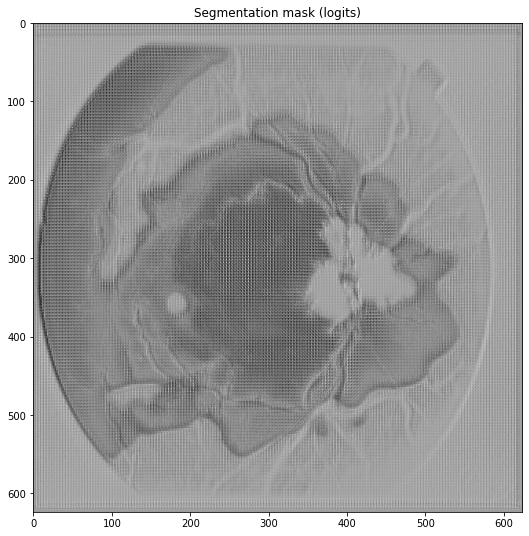

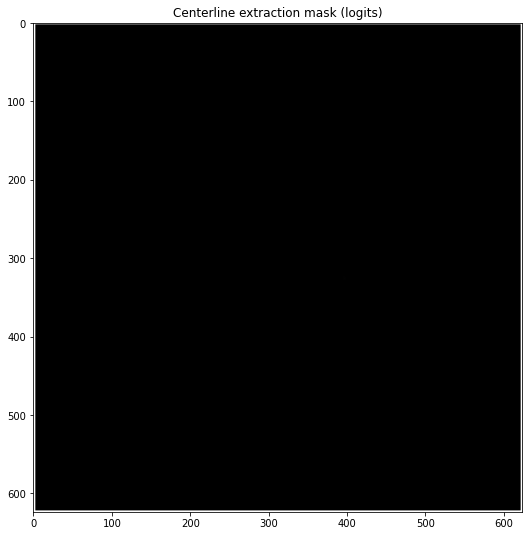

--------------------------------------------


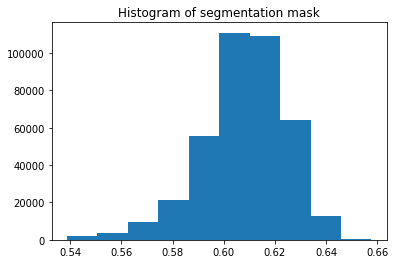

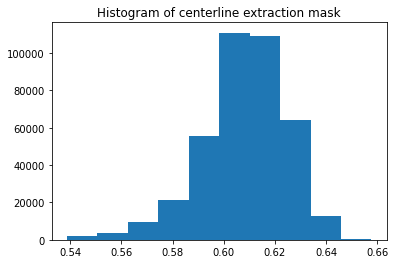

Metrics for segmentation: 
SE =  0.233103495357728
SP =  0.7705509886691846
accuracy =  0.7301143367850098
AUC =  0.5018272420134563
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


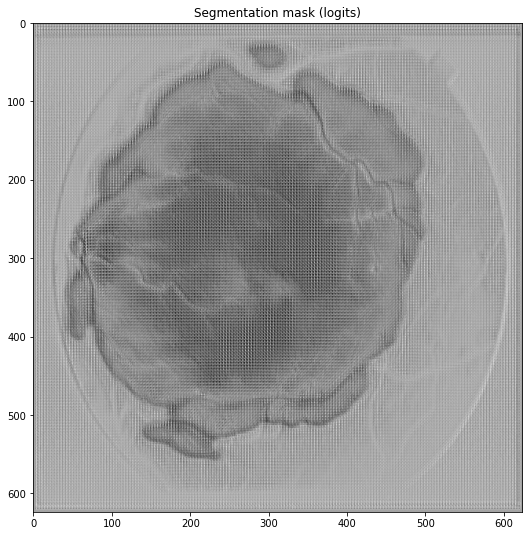

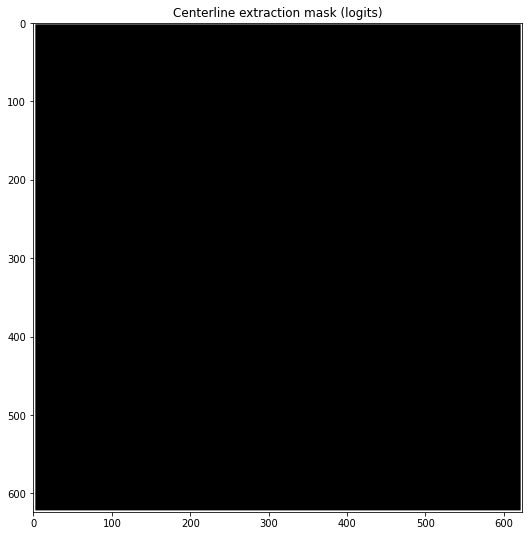

--------------------------------------------


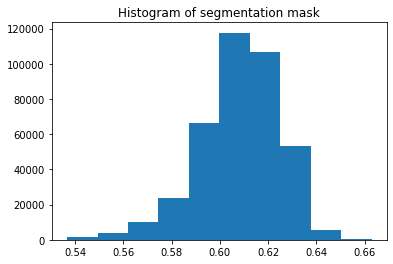

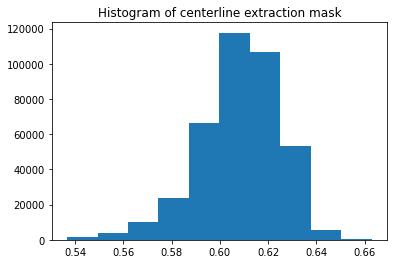

Metrics for segmentation: 
SE =  0.23186407967743047
SP =  0.7736063203638593
accuracy =  0.7332347140039448
AUC =  0.502735200020645
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


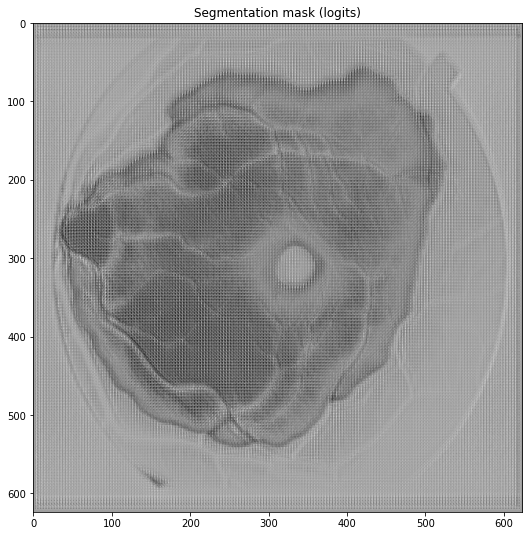

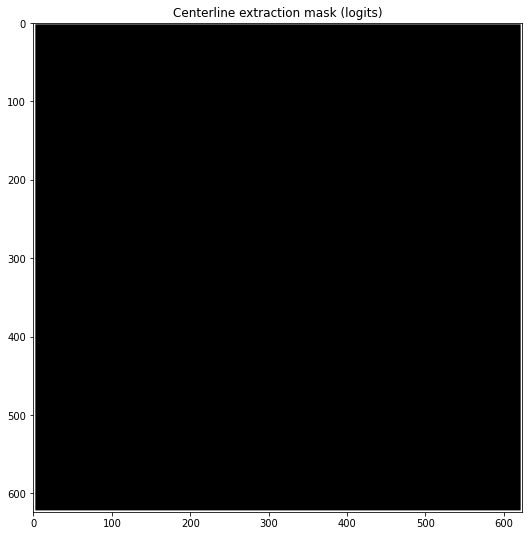

--------------------------------------------


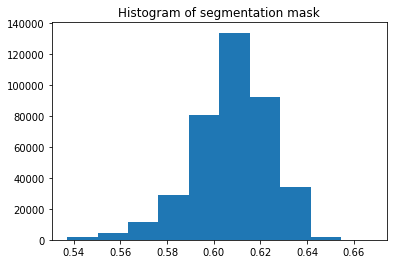

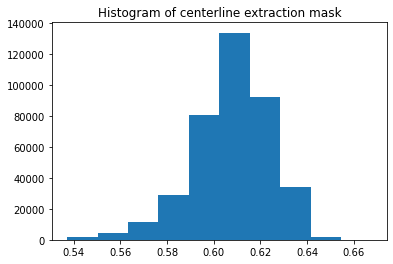

Metrics for segmentation: 
SE =  0.22743682310469315
SP =  0.7782491797047496
accuracy =  0.7335788543721236
AUC =  0.5028430014047214
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


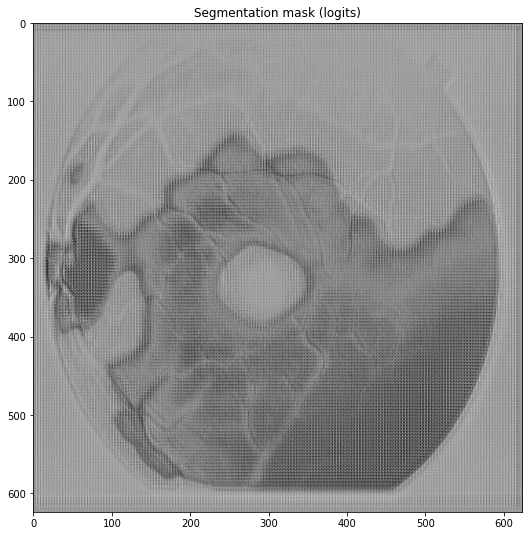

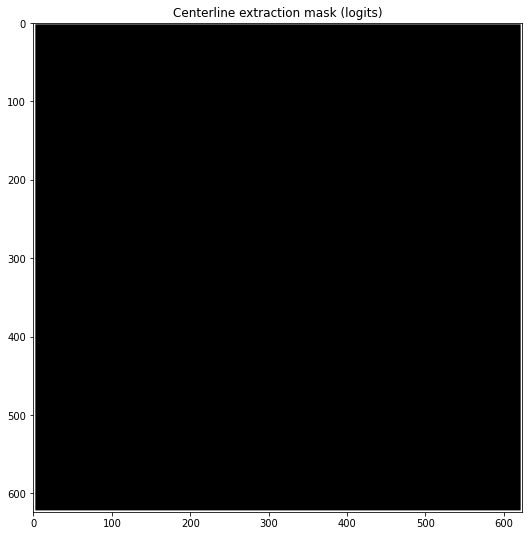

--------------------------------------------


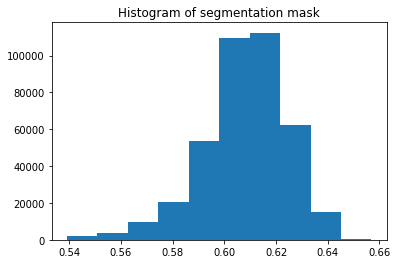

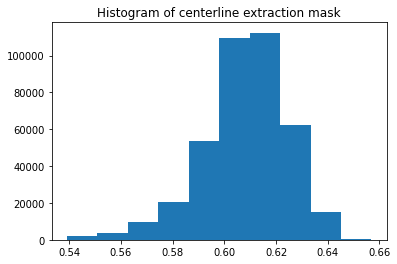

Metrics for segmentation: 
SE =  0.16970281468781254
SP =  0.7704466212850739
accuracy =  0.7272533489480605
AUC =  0.47007471798644324
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


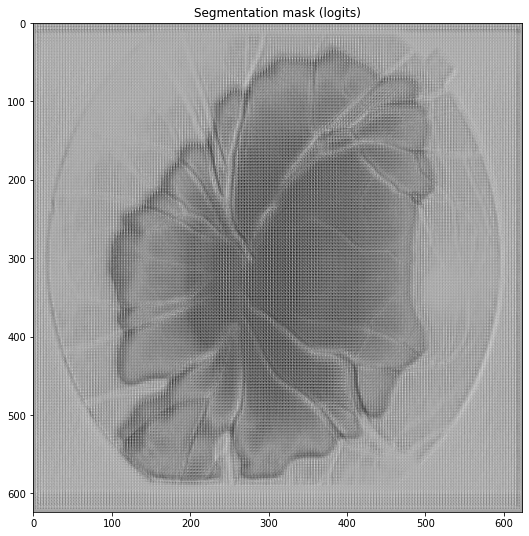

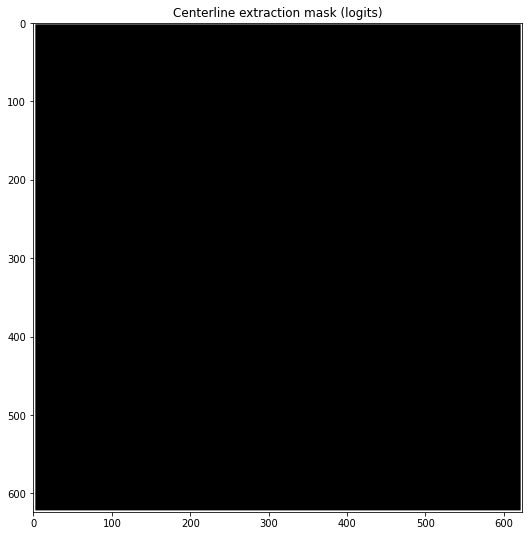

DRIVE, custom loss SE = 0.2110
DRIVE, custom loss SP = 0.7741
DRIVE, custom loss ACC = 0.7303
DRIVE, custom loss AUC = 0.4925


In [ ]:
## opracowanie wyników dla custom lossu

ses = []
sps = []
accs = []
aucs = []

net_custom_loss_stare = MSCNet(n_channels = 1, n_classes = 1)
net_custom_loss_stare.to(device)

dataset = DataLoaderSTARE("data/stare")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

net_custom_loss_stare.load_state_dict(torch.load("drive/MyDrive/wb/stare_custom_loss_stare_100.pth"))


for (image, mask_seg1, mask_seg2, mask_center) in test_loader:
  image = image.to(device)
  output_top, output_bot = net_custom_loss_stare(image)


  mask_top = torch.squeeze(output_top.cpu().detach()).numpy()
  mask_bot = torch.squeeze(output_bot.cpu().detach()).numpy()

  mask_seg1 = torch.squeeze(mask_seg1.cpu().detach()).numpy()
  mask_center = torch.squeeze(mask_center.cpu().detach()).numpy()

  print("--------------------------------------------")

  plt.hist(mask_top.flatten())
  plt.title("Histogram of segmentation mask")
  plt.show()

  plt.hist(mask_top.flatten())
  plt.title("Histogram of centerline extraction mask")
  plt.show()    


  ses.append(SE(mask_top, mask_seg1))
  sps.append(SP(mask_top, mask_seg1))
  accs.append(accuracy(mask_top, mask_seg1))
  aucs.append(AUC(mask_top, mask_seg1))

  print("Metrics for segmentation: ")
  print("SE = ",ses[-1])
  print("SP = ",sps[-1])
  print("accuracy = ",accs[-1])
  print("AUC = ", aucs[-1])


  print("Metrics for centerline extraction: ")
  print("SE = ",SE(mask_bot, mask_center))
  print("SP = ",SP(mask_bot, mask_center))
  print("accuracy = ",accuracy(mask_bot, mask_center))
  print("AUC = ", AUC(mask_bot, mask_center))




  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_top.cpu().detach()).numpy(), cmap="gray")
  plt.title("Segmentation mask (logits)")
  plt.show()

  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_bot.cpu().detach()).numpy(), cmap="gray")
  plt.title("Centerline extraction mask (logits)")
  plt.show()



print("DRIVE, custom loss SE = {:.4f}".format(sum(ses)/len(ses)))
print("DRIVE, custom loss SP = {:.4f}".format(sum(sps)/len(sps)))
print("DRIVE, custom loss ACC = {:.4f}".format(sum(accs)/len(accs)))
print("DRIVE, custom loss AUC = {:.4f}".format(sum(aucs)/len(aucs)))




### STARE BCE loss

In [ ]:
## STARE, BCE loss

n_epoch = 100

train_losses = []
eval_losses = []

net_BCE_loss_stare = MSCNet(n_channels = 1, n_classes = 1)
net_BCE_loss_stare.to(device)

dataset = DataLoaderSTARE("data/stare")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

optimizer = optim.Adam(net_BCE_loss_stare.parameters(), lr = 1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.9)


def train(epoch):
  running_loss = 0.0
  net_BCE_loss_stare.train()

  for (image, mask_seg1, mask_seg2, mask_center) in tqdm(train_loader):
    image = image.to(device)
    mask_seg1 = mask_seg1.to(device)
    mask_seg2 = mask_seg2.to(device)
    mask_center = mask_center.to(device)

    optimizer.zero_grad()
    output_top, output_bot = net_BCE_loss_stare(image)


    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1)) + criterion(torch.squeeze(output_bot), torch.squeeze(mask_seg2))

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  
def test(epoch):
  running_loss = 0.0

  net_BCE_loss_stare.eval()  

  with torch.no_grad():
    for (image, mask_seg1, mask_seg2, mask_center) in tqdm(test_loader):
      image = image.to(device)
      mask_seg1 = mask_seg1.to(device)
      mask_seg2 = mask_seg2.to(device)
      mask_center = mask_center.to(device)
      
      output_top, output_bot = net_BCE_loss_stare(image)

      criterion = nn.BCEWithLogitsLoss()
      loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1)) + criterion(torch.squeeze(output_bot), torch.squeeze(mask_seg2)) 

      running_loss+=loss.item()
      
  
  test_loss=running_loss/len(test_loader)

  eval_losses.append(test_loss)



for epoch in range(n_epoch+1):
  train(epoch)
  test(epoch)
  scheduler.step(eval_losses[-1])
  print(f"Epoch {epoch+1}, training_loss = {train_losses[-1]:.6f}, val_loss = {eval_losses[-1]:.6f}")
  if epoch % 50 == 0:
    torch.save(net_BCE_loss_stare.state_dict(), f'stare_BCE_loss_stare_{epoch}.pth')



### testowanie wyników

--------------------------------------------


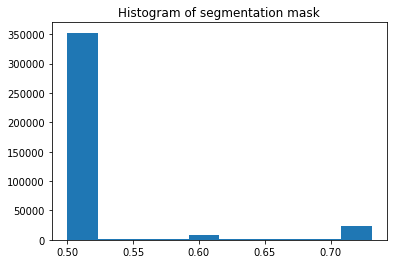

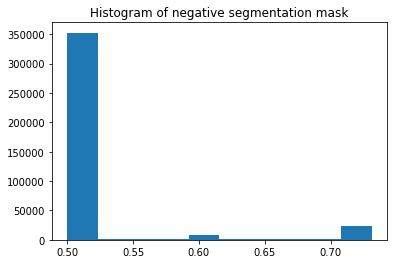

Metrics for segmentation: 
SE =  0.627046242083881
SP =  0.9844282101713965
accuracy =  0.9537028476331361
AUC =  0.8057372261276388
Metrics for negative segmentation: 
SE =  0.9243976505258527
SP =  0.8020802512688623
accuracy =  0.9105954142011834
AUC =  0.8632389508973575


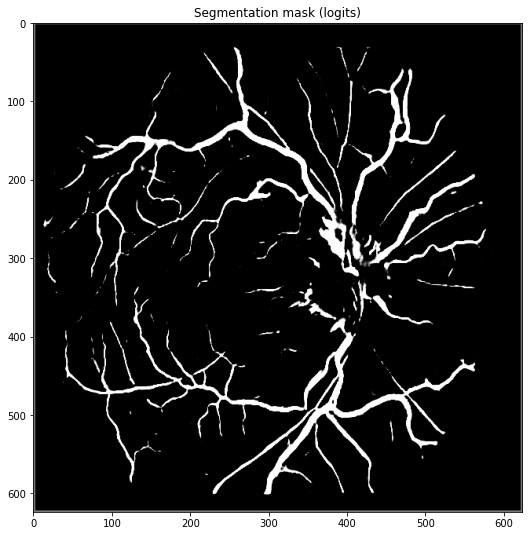

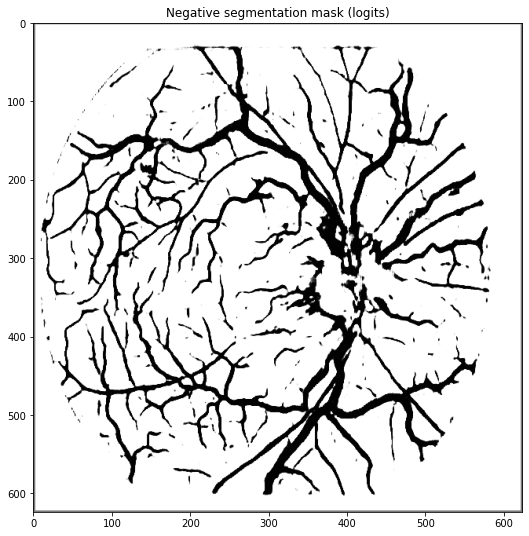

--------------------------------------------


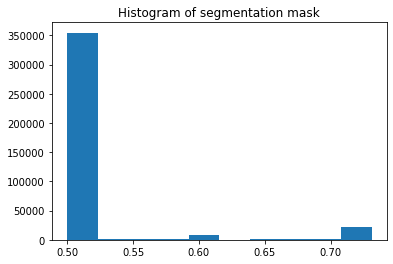

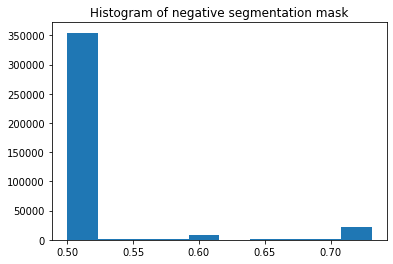

Metrics for segmentation: 
SE =  0.7155584380120152
SP =  0.9886358586980671
accuracy =  0.9680899695923735
AUC =  0.8520971483550412
Metrics for negative segmentation: 
SE =  0.9249673157935213
SP =  0.8541095353756953
accuracy =  0.917999568540434
AUC =  0.8895384255846083


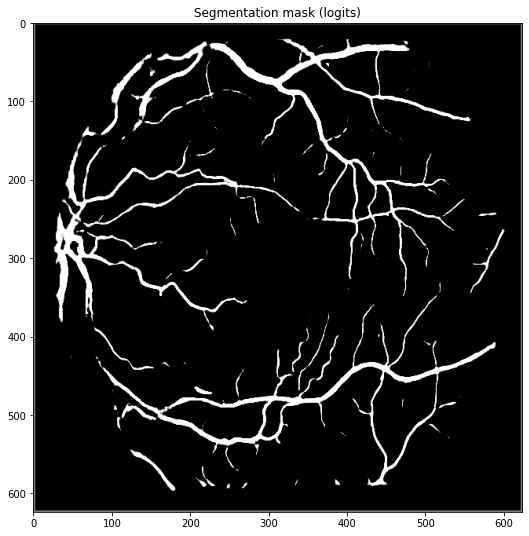

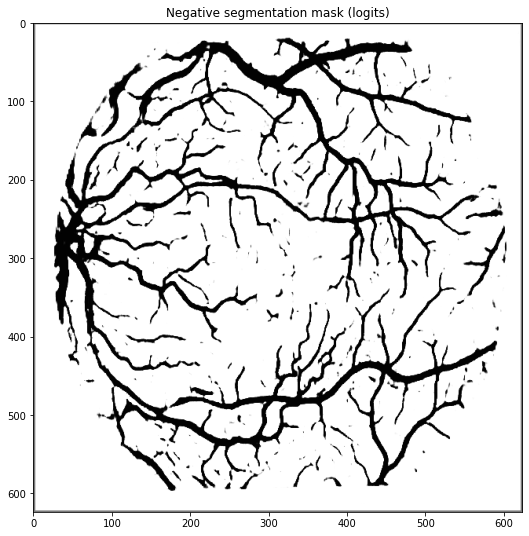

--------------------------------------------


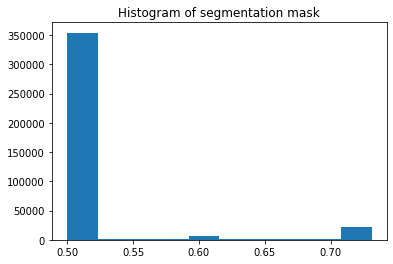

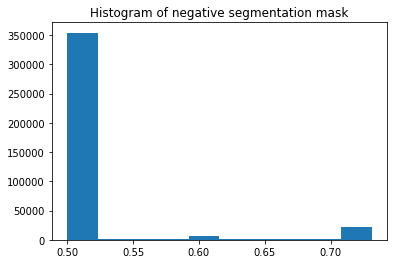

Metrics for segmentation: 
SE =  0.7793707137195437
SP =  0.9922049955738583
accuracy =  0.9763442020052597
AUC =  0.885787854646701
Metrics for negative segmentation: 
SE =  0.9544859776871008
SP =  0.81492343387471
accuracy =  0.9351757684089415
AUC =  0.8847047057809053


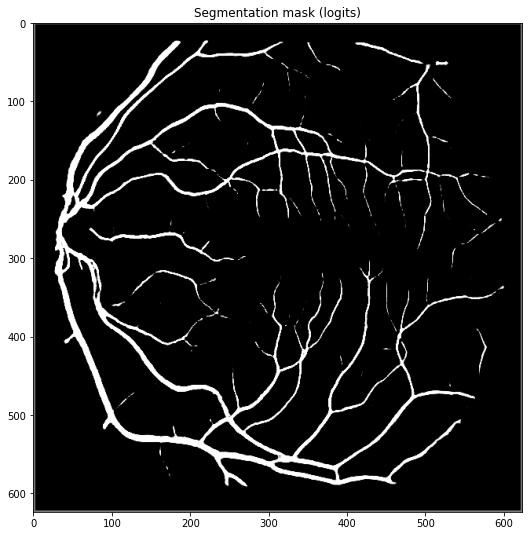

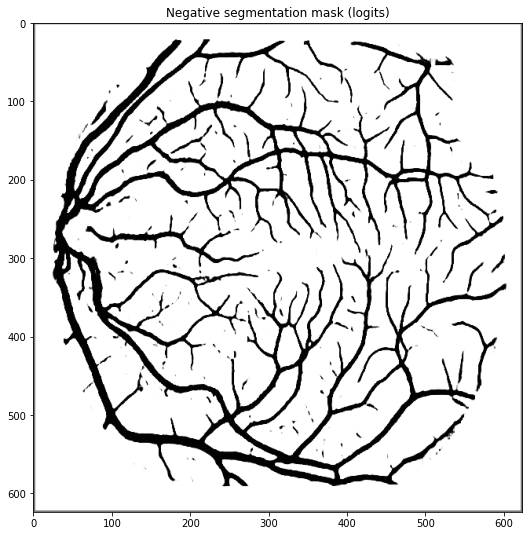

--------------------------------------------


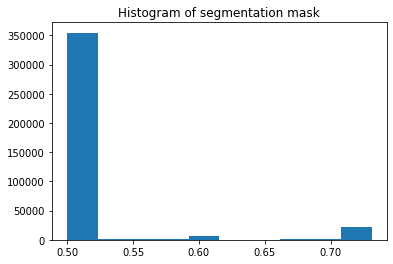

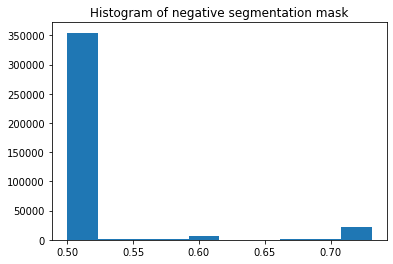

Metrics for segmentation: 
SE =  0.704921147634429
SP =  0.9915678679031186
accuracy =  0.9683211086456279
AUC =  0.8482445077687738
Metrics for negative segmentation: 
SE =  0.9557858969501799
SP =  0.7783579192546584
accuracy =  0.9323096441485864
AUC =  0.8670719081024192


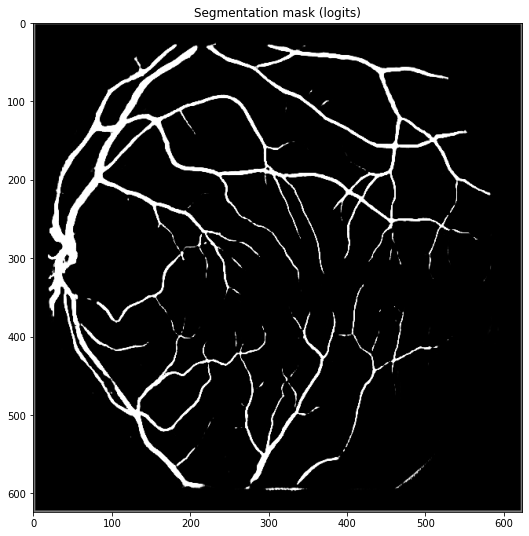

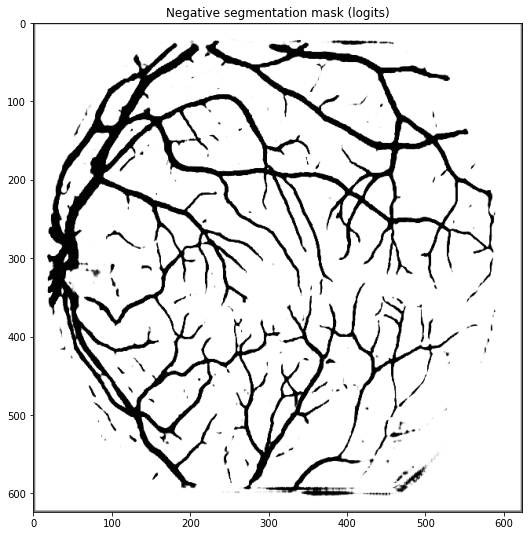

--------------------------------------------


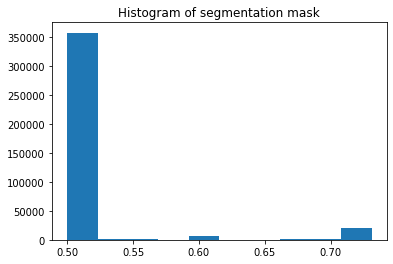

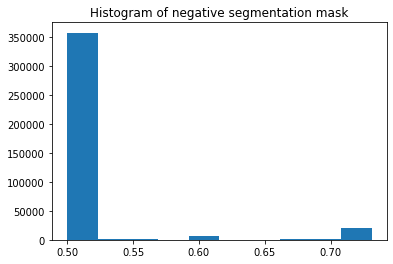

Metrics for segmentation: 
SE =  0.72524646378054
SP =  0.9923460069732691
accuracy =  0.9731416420118343
AUC =  0.8587962353769046
Metrics for negative segmentation: 
SE =  0.9568751536723296
SP =  0.8222454964390449
accuracy =  0.9403686924720579
AUC =  0.8895603250556873


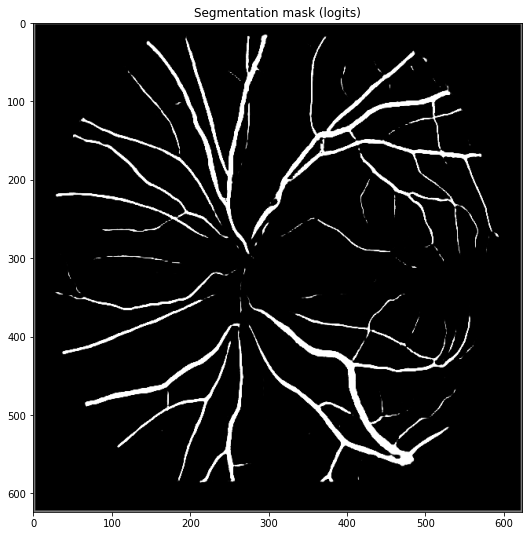

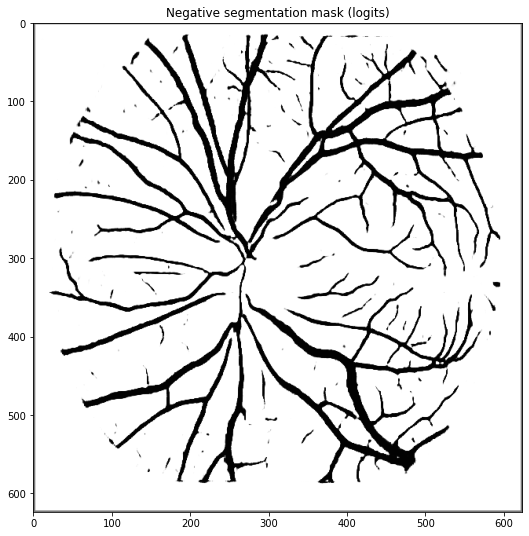

DRIVE, custom loss SE = 0.7104
DRIVE, custom loss SP = 0.9898
DRIVE, custom loss ACC = 0.9679
DRIVE, custom loss AUC = 0.8501


In [ ]:
## opracowanie wyników dla BCE lossu


ses = []
sps = []
accs = []
aucs = []

net_BCE_loss_stare = MSCNet(n_channels = 1, n_classes = 1)
net_BCE_loss_stare.to(device)

dataset = DataLoaderSTARE("data/stare")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

net_BCE_loss_stare.load_state_dict(torch.load("drive/MyDrive/wb/stare_BCE_loss_stare_100.pth"))

for (image, mask_seg1, mask_seg2, mask_center) in test_loader:
  image = image.to(device)
  output_top, output_bot = net_BCE_loss_stare(image)


  mask_top = torch.squeeze(output_top.cpu().detach()).numpy()
  mask_bot = torch.squeeze(output_bot.cpu().detach()).numpy()

  mask_seg1 = torch.squeeze(mask_seg1.cpu().detach()).numpy()
  mask_seg2 = torch.squeeze(mask_seg2.cpu().detach()).numpy()

  print("--------------------------------------------")

  plt.hist(mask_top.flatten())
  plt.title("Histogram of segmentation mask")
  plt.show()

  plt.hist(mask_top.flatten())
  plt.title("Histogram of negative segmentation mask")
  plt.show()    


  ses.append(SE(mask_top, mask_seg1))
  sps.append(SP(mask_top, mask_seg1))
  accs.append(accuracy(mask_top, mask_seg1))
  aucs.append(AUC(mask_top, mask_seg1))

  print("Metrics for segmentation: ")
  print("SE = ",ses[-1])
  print("SP = ",sps[-1])
  print("accuracy = ",accs[-1])
  print("AUC = ", aucs[-1])



  print("Metrics for negative segmentation: ")
  print("SE = ",SE(mask_bot, mask_seg2))
  print("SP = ",SP(mask_bot, mask_seg2))
  print("accuracy = ",accuracy(mask_bot, mask_seg2))
  print("AUC = ", AUC(mask_bot, mask_seg2))




  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_top.cpu().detach()).numpy(), cmap="gray")
  plt.title("Segmentation mask (logits)")
  plt.show()

  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_bot.cpu().detach()).numpy(), cmap="gray")
  plt.title("Negative segmentation mask (logits)")
  plt.show()

print("DRIVE, custom loss SE = {:.4f}".format(sum(ses)/len(ses)))
print("DRIVE, custom loss SP = {:.4f}".format(sum(sps)/len(sps)))
print("DRIVE, custom loss ACC = {:.4f}".format(sum(accs)/len(accs)))
print("DRIVE, custom loss AUC = {:.4f}".format(sum(aucs)/len(aucs)))




### CHASE custom loss

In [ ]:
## CHASE, custom loss

n_epoch = 100

train_losses = []
eval_losses = []

net_custom_loss_chase = MSCNet(n_channels = 1, n_classes = 1, inner_sizes=(59, 114, 234, 474), output_size=960)
net_custom_loss_chase.to(device)

dataset = DataLoaderCHASE("data/chase")
train, test = torch.utils.data.random_split(dataset, [21,7], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

optimizer = optim.Adam(net_custom_loss_chase.parameters(), lr = 1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.9)


def train(epoch):
  running_loss = 0.0
  net_custom_loss_chase.train()

  for (image, mask_seg1, mask_seg2, mask_center) in tqdm(train_loader):
    image = image.to(device)
    mask_seg1 = mask_seg1.to(device)
    mask_seg2 = mask_seg2.to(device)
    mask_center = mask_center.to(device)

    optimizer.zero_grad()
    output_top, output_bot = net_custom_loss_chase(image)


    criterion = CustomLoss(0.2, 0.5, 0.1, threshold=0.63)
    loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1), torch.squeeze(output_bot), torch.squeeze(mask_center))

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  
def test(epoch):
  running_loss = 0.0

  net_custom_loss_chase.eval()  

  with torch.no_grad():
    for (image, mask_seg1, mask_seg2, mask_center) in tqdm(test_loader):
      image = image.to(device)
      mask_seg1 = mask_seg1.to(device)
      mask_seg2 = mask_seg2.to(device)
      mask_center = mask_center.to(device)
      
      output_top, output_bot = net_custom_loss_chase(image)

      criterion = CustomLoss(0.2, 0.5, 0.1, threshold=0.63)
      loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1), torch.squeeze(output_bot), torch.squeeze(mask_center))

      running_loss+=loss.item()
      
  
  test_loss=running_loss/len(test_loader)

  eval_losses.append(test_loss)



for epoch in range(n_epoch+1):
  train(epoch)
  test(epoch)
  scheduler.step(eval_losses[-1])
  print(f"Epoch {epoch+1}, training_loss = {train_losses[-1]:.6f}, val_loss = {eval_losses[-1]:.6f}")
  if epoch % 50 == 0:
    torch.save(net_custom_loss_chase.state_dict(), f'custom_loss_chase_{epoch}.pth')



RuntimeError: ignored

### testowanie wyników

In [ ]:
## opracowanie wyników dla custom lossu

for (image, mask_seg1, mask_seg2, mask_center) in train_loader:
  image = image.to(device)
  output_top, output_bot = net_custom_loss_chase(image)


  mask_top = torch.squeeze(output_top.cpu().detach()).numpy()
  mask_bot = torch.squeeze(output_bot.cpu().detach()).numpy()

  mask_seg1 = torch.squeeze(mask_seg1.cpu().detach()).numpy()
  mask_center = torch.squeeze(mask_center.cpu().detach()).numpy()

  print("--------------------------------------------")

  plt.hist(mask_top.flatten())
  plt.title("Histogram of segmentation mask")
  plt.show()

  plt.hist(mask_top.flatten())
  plt.title("Histogram of centerline extraction mask")
  plt.show()    


  print("Metrics for segmentation: ")
  print("SE = ",SE(mask_top, mask_seg1))
  print("SP = ",SP(mask_top, mask_seg1))
  print("accuracy = ",accuracy(mask_top, mask_seg1))
  print("AUC = ", AUC(mask_top, mask_seg1))


  print("Metrics for centerline extraction: ")
  print("SE = ",SE(mask_bot, mask_center))
  print("SP = ",SP(mask_bot, mask_center))
  print("accuracy = ",accuracy(mask_bot, mask_center))
  print("AUC = ", AUC(mask_bot, mask_center))




  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_top.cpu().detach()).numpy(), cmap="gray")
  plt.title("Segmentation mask (logits)")
  plt.show()

  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_bot.cpu().detach()).numpy(), cmap="gray")
  plt.title("Centerline extraction mask (logits)")
  plt.show()





### CHASE BCE loss

In [ ]:
## CHASE, BCE loss

n_epoch = 100

train_losses = []
eval_losses = []

net_BCE_loss_chase = MSCNet(n_channels = 1, n_classes = 1, inner_sizes=(59, 114, 234, 474), output_size=960)
net_BCE_loss_chase.to(device)

dataset = DataLoaderCHASE("data/chase")
train, test = torch.utils.data.random_split(dataset, [21,7], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

optimizer = optim.Adam(net_BCE_loss_chase.parameters(), lr = 1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.9)


def train(epoch):
  running_loss = 0.0
  net_BCE_loss_chase.train()

  for (image, mask_seg1, mask_seg2, mask_center) in tqdm(train_loader):
    image = image.to(device)
    mask_seg1 = mask_seg1.to(device)
    mask_seg2 = mask_seg2.to(device)
    mask_center = mask_center.to(device)

    optimizer.zero_grad()
    output_top, output_bot = net_BCE_loss_chase(image)


    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1)) + criterion(torch.squeeze(output_bot), torch.squeeze(mask_seg2)) 

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  
def test(epoch):
  running_loss = 0.0

  net_BCE_loss_chase.eval()  

  with torch.no_grad():
    for (image, mask_seg1, mask_seg2, mask_center) in tqdm(test_loader):
      image = image.to(device)
      mask_seg1 = mask_seg1.to(device)
      mask_seg2 = mask_seg2.to(device)
      mask_center = mask_center.to(device)
      
      output_top, output_bot = net_BCE_loss_chase(image)

      criterion = nn.BCEWithLogitsLoss()
      loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1)) + criterion(torch.squeeze(output_bot), torch.squeeze(mask_seg2)) 


      running_loss+=loss.item()
      
  
  test_loss=running_loss/len(test_loader)

  eval_losses.append(test_loss)



for epoch in range(n_epoch+1):
  train(epoch)
  test(epoch)
  scheduler.step(eval_losses[-1])
  print(f"Epoch {epoch+1}, training_loss = {train_losses[-1]:.6f}, val_loss = {eval_losses[-1]:.6f}")
  if epoch % 50 == 0:
    torch.save(net_BCE_loss_chase.state_dict(), f'BCE_loss_chase_{epoch}.pth')



### testowanie wyników

In [ ]:
## opracowanie wyników dla BCE lossu

for (image, mask_seg1, mask_seg2, mask_center) in train_loader:
  image = image.to(device)
  output_top, output_bot = net_BCE_loss_chase(image)


  mask_top = torch.squeeze(output_top.cpu().detach()).numpy()
  mask_bot = torch.squeeze(output_bot.cpu().detach()).numpy()

  mask_seg1 = torch.squeeze(mask_seg1.cpu().detach()).numpy()
  mask_seg2 = torch.squeeze(mask_seg2.cpu().detach()).numpy()

  print("--------------------------------------------")

  plt.hist(mask_top.flatten())
  plt.title("Histogram of segmentation mask")
  plt.show()

  plt.hist(mask_top.flatten())
  plt.title("Histogram of negative segmentation mask")
  plt.show()    


  print("Metrics for segmentation: ")
  print("SE = ",SE(mask_top, mask_seg1))
  print("SP = ",SP(mask_top, mask_seg1))
  print("accuracy = ",accuracy(mask_top, mask_seg1))
  print("AUC = ", AUC(mask_top, mask_seg1))


  print("Metrics for negative segmentation: ")
  print("SE = ",SE(mask_bot, mask_seg2))
  print("SP = ",SP(mask_bot, mask_seg2))
  print("accuracy = ",accuracy(mask_bot, mask_seg2))
  print("AUC = ", AUC(mask_bot, mask_seg2))




  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_top.cpu().detach()).numpy(), cmap="gray")
  plt.title("Segmentation mask (logits)")
  plt.show()

  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_bot.cpu().detach()).numpy(), cmap="gray")
  plt.title("Negative segmentation mask (logits)")
  plt.show()





### DRIVE custom loss

In [ ]:
## DRIVE, custom loss

n_epoch = 100

train_losses = []
eval_losses = []

net_custom_loss_drive = MSCNet(n_channels = 1, n_classes = 1, inner_sizes=(35, 66, 138, 282), output_size=576)
net_custom_loss_drive.to(device)

dataset = DataLoaderDRIVE("data/drive")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

optimizer = optim.Adam(net_custom_loss_drive.parameters(), lr = 1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.9)


def train(epoch):
  running_loss = 0.0
  net_custom_loss_drive.train()

  for (image, mask_seg1, mask_seg2, mask_center) in tqdm(train_loader):
    image = image.to(device)
    mask_seg1 = mask_seg1.to(device)
    mask_seg2 = mask_seg2.to(device)
    mask_center = mask_center.to(device)

    optimizer.zero_grad()
    output_top, output_bot = net_custom_loss_drive(image)


    criterion = CustomLoss(0.2, 0.5, 0.1, threshold=0.63)
    loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1), torch.squeeze(output_bot), torch.squeeze(mask_center))

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  
def test(epoch):
  running_loss = 0.0

  net_custom_loss_drive.eval()  

  with torch.no_grad():
    for (image, mask_seg1, mask_seg2, mask_center) in tqdm(test_loader):
      image = image.to(device)
      mask_seg1 = mask_seg1.to(device)
      mask_seg2 = mask_seg2.to(device)
      mask_center = mask_center.to(device)
      
      output_top, output_bot = net_custom_loss_drive(image)

      criterion = CustomLoss(0.2, 0.5, 0.1, threshold=0.63)
      loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1), torch.squeeze(output_bot), torch.squeeze(mask_center))

      running_loss+=loss.item()
      
  
  test_loss=running_loss/len(test_loader)

  eval_losses.append(test_loss)



for epoch in range(n_epoch+1):
  train(epoch)
  test(epoch)
  scheduler.step(eval_losses[-1])
  print(f"Epoch {epoch+1}, training_loss = {train_losses[-1]:.6f}, val_loss = {eval_losses[-1]:.6f}")
  if epoch % 50 == 0:
    torch.save(net_custom_loss_drive.state_dict(), f'custom_loss_drive_{epoch}.pth')



100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


Epoch 1, training_loss = 0.348543, val_loss = 0.301229


100%|██████████| 5/5 [00:01<00:00,  3.99it/s]


Epoch 2, training_loss = 0.277815, val_loss = 0.284094


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


Epoch 3, training_loss = 0.272270, val_loss = 0.275870


100%|██████████| 5/5 [00:01<00:00,  4.11it/s]


Epoch 4, training_loss = 0.271587, val_loss = 0.271581


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 5, training_loss = 0.271502, val_loss = 0.270210


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 6, training_loss = 0.271529, val_loss = 0.271101


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 7, training_loss = 0.271553, val_loss = 0.270416


100%|██████████| 5/5 [00:01<00:00,  3.69it/s]


Epoch 8, training_loss = 0.271216, val_loss = 0.270763


100%|██████████| 5/5 [00:01<00:00,  4.12it/s]


Epoch 9, training_loss = 0.270758, val_loss = 0.270828


100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


Epoch 10, training_loss = 0.270554, val_loss = 0.270535


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 11, training_loss = 0.270426, val_loss = 0.270056


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 12, training_loss = 0.270310, val_loss = 0.270422


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 13, training_loss = 0.270134, val_loss = 0.270080


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 14, training_loss = 0.269995, val_loss = 0.270030


100%|██████████| 5/5 [00:01<00:00,  4.14it/s]


Epoch 15, training_loss = 0.269960, val_loss = 0.269674


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 16, training_loss = 0.269931, val_loss = 0.269680


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 17, training_loss = 0.269979, val_loss = 0.269860


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 18, training_loss = 0.270048, val_loss = 0.269663


100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


Epoch 19, training_loss = 0.270077, val_loss = 0.269809


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 20, training_loss = 0.270097, val_loss = 0.270301


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 21, training_loss = 0.270199, val_loss = 0.269839


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 22, training_loss = 0.270228, val_loss = 0.270149


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 23, training_loss = 0.270294, val_loss = 0.270053


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 24, training_loss = 0.270398, val_loss = 0.270037


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 25, training_loss = 0.270446, val_loss = 0.270093


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 26, training_loss = 0.270487, val_loss = 0.270209


100%|██████████| 5/5 [00:01<00:00,  4.22it/s]


Epoch 27, training_loss = 0.270555, val_loss = 0.270369


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 28, training_loss = 0.270569, val_loss = 0.270335


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 29, training_loss = 0.270604, val_loss = 0.270164


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 30, training_loss = 0.270632, val_loss = 0.270370


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 31, training_loss = 0.270694, val_loss = 0.270399


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 32, training_loss = 0.270758, val_loss = 0.270524


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 33, training_loss = 0.270859, val_loss = 0.270372


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 34, training_loss = 0.270854, val_loss = 0.270816


100%|██████████| 5/5 [00:01<00:00,  4.14it/s]


Epoch 35, training_loss = 0.270948, val_loss = 0.270464


100%|██████████| 5/5 [00:01<00:00,  4.22it/s]


Epoch 36, training_loss = 0.270982, val_loss = 0.271040


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Epoch 37, training_loss = 0.271077, val_loss = 0.270763


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 38, training_loss = 0.271119, val_loss = 0.270849


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 39, training_loss = 0.271134, val_loss = 0.270963


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 40, training_loss = 0.271245, val_loss = 0.270814


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Epoch 41, training_loss = 0.271268, val_loss = 0.271048


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 42, training_loss = 0.271306, val_loss = 0.271116


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 43, training_loss = 0.271431, val_loss = 0.271065


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 44, training_loss = 0.271451, val_loss = 0.271048


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 45, training_loss = 0.271446, val_loss = 0.271371


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 46, training_loss = 0.271563, val_loss = 0.271236


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 47, training_loss = 0.271597, val_loss = 0.271198


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Epoch 48, training_loss = 0.271612, val_loss = 0.271352


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Epoch 49, training_loss = 0.271658, val_loss = 0.271414


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 50, training_loss = 0.271726, val_loss = 0.271355


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 51, training_loss = 0.271745, val_loss = 0.271550


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 52, training_loss = 0.271805, val_loss = 0.271547


100%|██████████| 5/5 [00:01<00:00,  4.14it/s]


Epoch 53, training_loss = 0.271858, val_loss = 0.271600


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 54, training_loss = 0.271909, val_loss = 0.271617


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 55, training_loss = 0.271925, val_loss = 0.271595


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 56, training_loss = 0.271973, val_loss = 0.271658


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 57, training_loss = 0.272005, val_loss = 0.271684


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 58, training_loss = 0.272035, val_loss = 0.271739


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 59, training_loss = 0.272063, val_loss = 0.271728


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 60, training_loss = 0.272103, val_loss = 0.271723


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 61, training_loss = 0.272130, val_loss = 0.271801


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 62, training_loss = 0.272145, val_loss = 0.271822


100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


Epoch 63, training_loss = 0.272181, val_loss = 0.271911


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 64, training_loss = 0.272226, val_loss = 0.271902


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 65, training_loss = 0.272247, val_loss = 0.271869


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 66, training_loss = 0.272281, val_loss = 0.271935


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Epoch 67, training_loss = 0.272296, val_loss = 0.271943


100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


Epoch 68, training_loss = 0.272315, val_loss = 0.271993


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 69, training_loss = 0.272344, val_loss = 0.272025


100%|██████████| 5/5 [00:01<00:00,  4.24it/s]


Epoch 70, training_loss = 0.272361, val_loss = 0.272026


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 71, training_loss = 0.272380, val_loss = 0.272073


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 72, training_loss = 0.272399, val_loss = 0.272146


100%|██████████| 5/5 [00:01<00:00,  3.91it/s]


Epoch 73, training_loss = 0.272430, val_loss = 0.272116


100%|██████████| 5/5 [00:01<00:00,  4.22it/s]


Epoch 74, training_loss = 0.272439, val_loss = 0.272146


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 75, training_loss = 0.272474, val_loss = 0.272156


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 76, training_loss = 0.272471, val_loss = 0.272202


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 77, training_loss = 0.272495, val_loss = 0.272208


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


Epoch 78, training_loss = 0.272514, val_loss = 0.272226


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 79, training_loss = 0.272532, val_loss = 0.272241


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 80, training_loss = 0.272543, val_loss = 0.272228


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 81, training_loss = 0.272571, val_loss = 0.272295


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 82, training_loss = 0.272585, val_loss = 0.272285


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 83, training_loss = 0.272600, val_loss = 0.272317


100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


Epoch 84, training_loss = 0.272617, val_loss = 0.272313


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Epoch 85, training_loss = 0.272625, val_loss = 0.272347


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 86, training_loss = 0.272639, val_loss = 0.272374


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 87, training_loss = 0.272654, val_loss = 0.272357


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 88, training_loss = 0.272668, val_loss = 0.272380


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 89, training_loss = 0.272688, val_loss = 0.272412


100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Epoch 90, training_loss = 0.272707, val_loss = 0.272397


100%|██████████| 5/5 [00:01<00:00,  4.13it/s]


Epoch 91, training_loss = 0.272715, val_loss = 0.272388


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 92, training_loss = 0.272727, val_loss = 0.272398


100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


Epoch 93, training_loss = 0.272744, val_loss = 0.272425


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 94, training_loss = 0.272747, val_loss = 0.272498


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 95, training_loss = 0.272757, val_loss = 0.272465


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Epoch 96, training_loss = 0.272776, val_loss = 0.272516


100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


Epoch 97, training_loss = 0.272785, val_loss = 0.272540


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]


Epoch 98, training_loss = 0.272802, val_loss = 0.272472


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 99, training_loss = 0.272812, val_loss = 0.272514


100%|██████████| 5/5 [00:01<00:00,  4.17it/s]


Epoch 100, training_loss = 0.272822, val_loss = 0.272553


100%|██████████| 5/5 [00:01<00:00,  4.20it/s]


Epoch 101, training_loss = 0.272833, val_loss = 0.272542


### testowanie wyników

--------------------------------------------


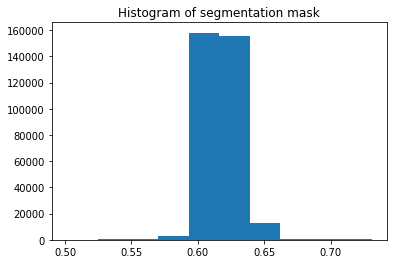

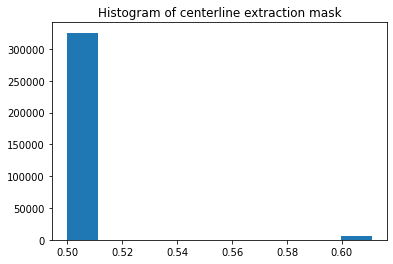

Metrics for segmentation: 
SE =  0.33966018674422166
SP =  0.6301546897697975
accuracy =  0.6072741849922839
AUC =  0.48490743825700966
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


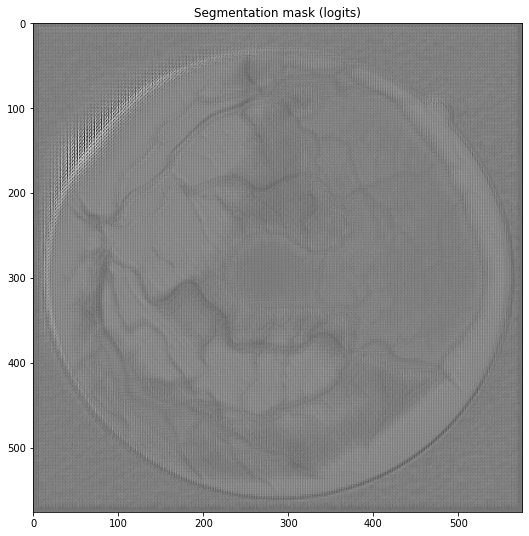

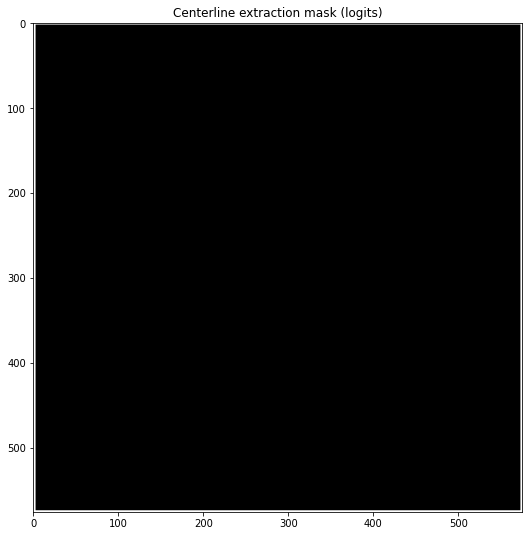

--------------------------------------------


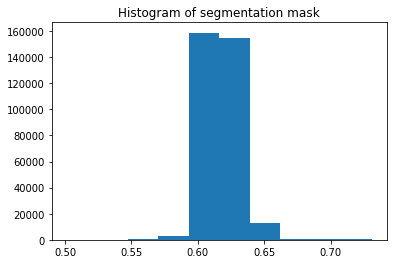

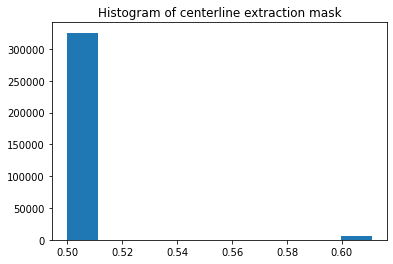

Metrics for segmentation: 
SE =  0.30672041689199153
SP =  0.6248880183665934
accuracy =  0.6053813416280864
AUC =  0.4658042176292924
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


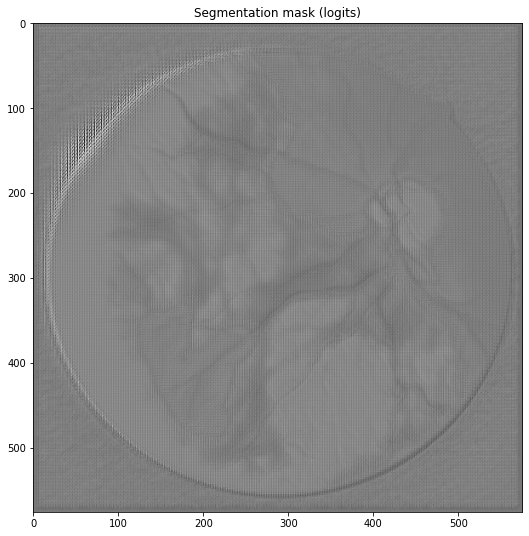

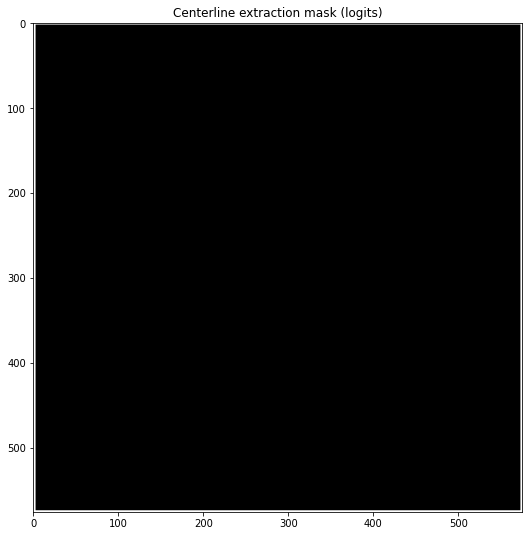

--------------------------------------------


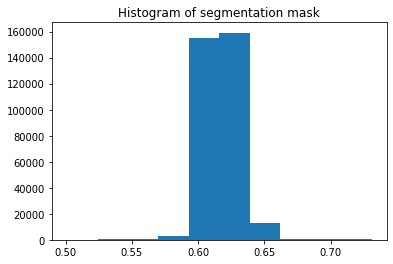

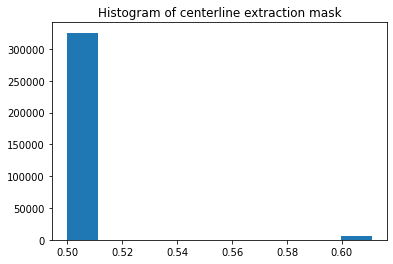

Metrics for segmentation: 
SE =  0.38730311575761744
SP =  0.6283457439428077
accuracy =  0.6072199315200617
AUC =  0.5078244298502126
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


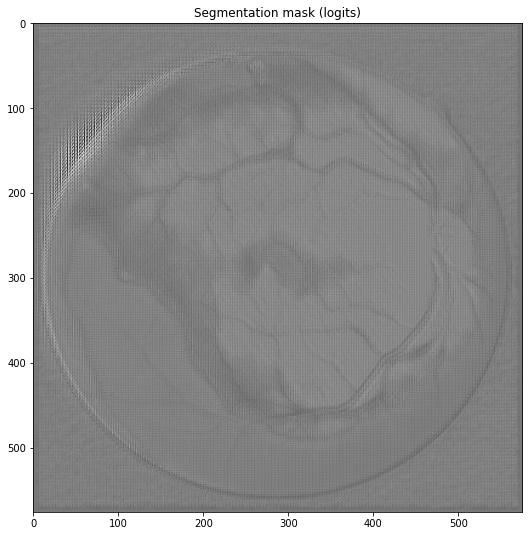

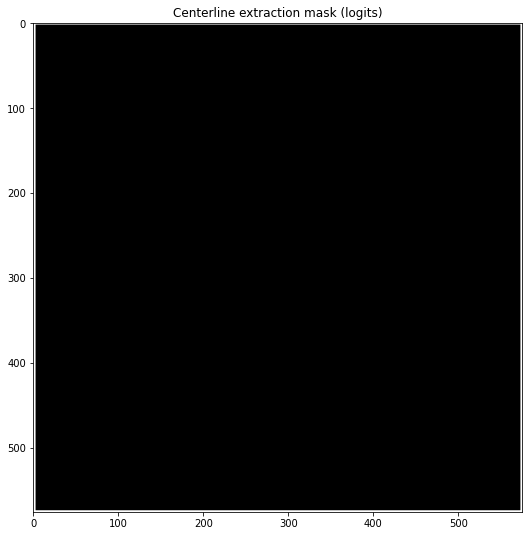

--------------------------------------------


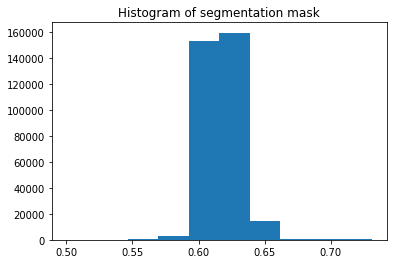

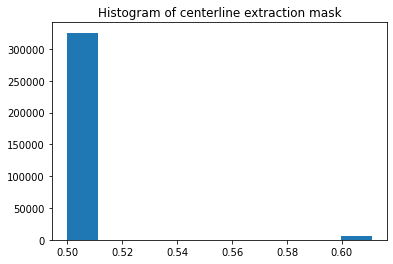

Metrics for segmentation: 
SE =  0.43215895808983135
SP =  0.6270827052224589
accuracy =  0.6094895351080247
AUC =  0.529620831656145
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


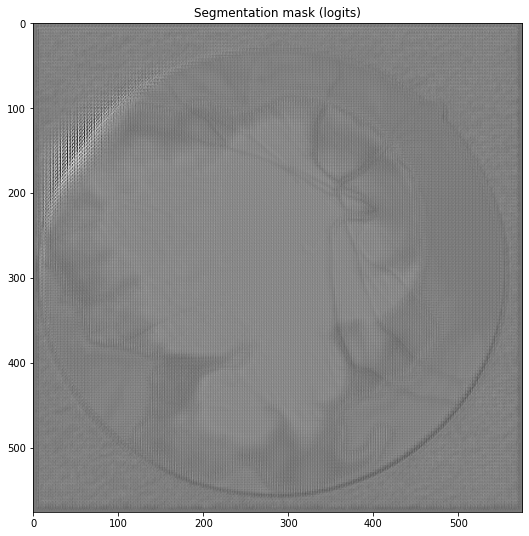

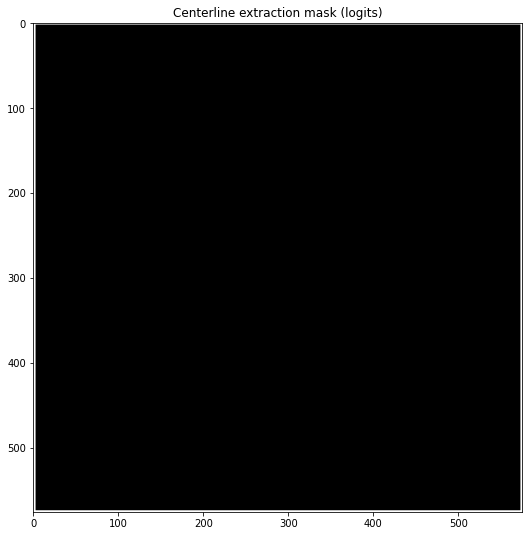

--------------------------------------------


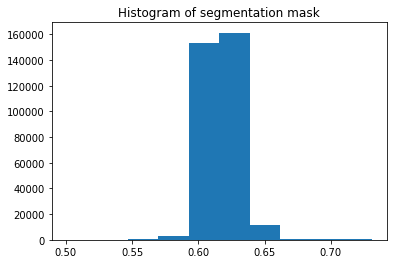

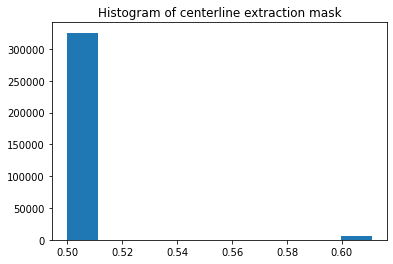

Metrics for segmentation: 
SE =  0.35532575787362874
SP =  0.6255047446816151
accuracy =  0.6047935956790124
AUC =  0.490415251277622
Metrics for centerline extraction: 
SE =  nan
SP =  1.0
accuracy =  1.0
AUC =  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


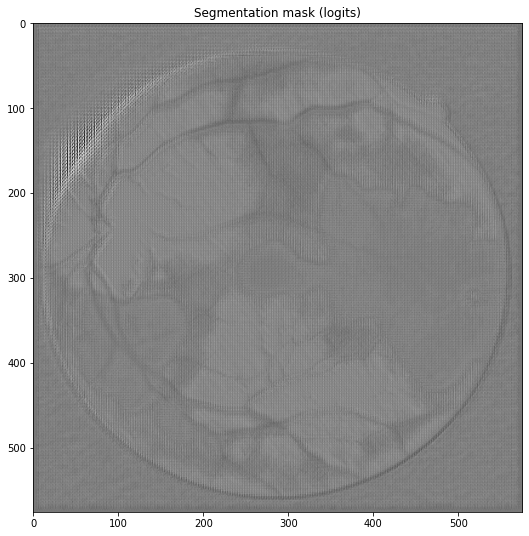

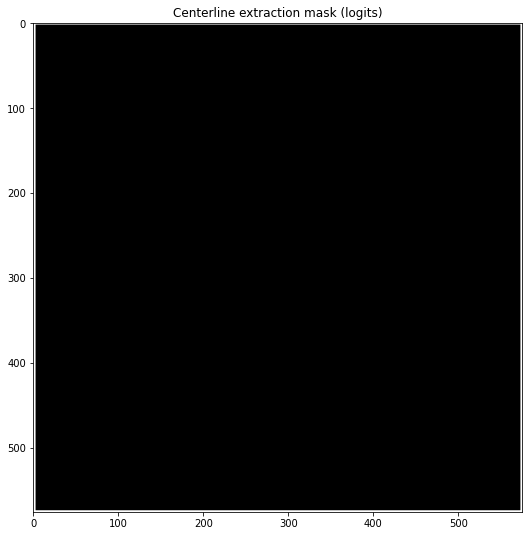

DRIVE, custom loss SE = 0.3642
DRIVE, custom loss SP = 0.6272
DRIVE, custom loss ACC = 0.6068
DRIVE, custom loss AUC = 0.4957


In [ ]:
ses = []
sps = []
accs = []
aucs = []


## opracowanie wyników dla custom lossu

net_custom_loss_drive = MSCNet(n_channels = 1, n_classes = 1, inner_sizes=(35, 66, 138, 282), output_size=576)
net_custom_loss_drive.to(device)

dataset = DataLoaderDRIVE("data/drive")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

net_custom_loss_drive.load_state_dict(torch.load("drive/MyDrive/wb/custom_loss_drive_100.pth"))


for (image, mask_seg1, mask_seg2, mask_center) in test_loader:
  image = image.to(device)
  output_top, output_bot = net_custom_loss_drive(image)


  mask_top = torch.squeeze(output_top.cpu().detach()).numpy()
  mask_bot = torch.squeeze(output_bot.cpu().detach()).numpy()

  mask_seg1 = torch.squeeze(mask_seg1.cpu().detach()).numpy()
  mask_center = torch.squeeze(mask_center.cpu().detach()).numpy()

  print("--------------------------------------------")

  plt.hist(mask_top.flatten())
  plt.title("Histogram of segmentation mask")
  plt.show()

  plt.hist(mask_bot.flatten())
  plt.title("Histogram of centerline extraction mask")
  plt.show()    


  ses.append(SE(mask_top, mask_seg1))
  sps.append(SP(mask_top, mask_seg1))
  accs.append(accuracy(mask_top, mask_seg1))
  aucs.append(AUC(mask_top, mask_seg1))

  print("Metrics for segmentation: ")
  print("SE = ",ses[-1])
  print("SP = ",sps[-1])
  print("accuracy = ",accs[-1])
  print("AUC = ", aucs[-1])


  print("Metrics for centerline extraction: ")
  print("SE = ",SE(mask_bot, mask_center))
  print("SP = ",SP(mask_bot, mask_center))
  print("accuracy = ",accuracy(mask_bot, mask_center))
  print("AUC = ", AUC(mask_bot, mask_center))




  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_top.cpu().detach()).numpy(), cmap="gray")
  plt.title("Segmentation mask (logits)")
  plt.show()

  plt.figure(figsize=(16,9))
  plt.imshow(torch.squeeze(output_bot.cpu().detach()).numpy(), cmap="gray")
  plt.title("Centerline extraction mask (logits)")
  plt.show()

print("DRIVE, custom loss SE = {:.4f}".format(sum(ses)/len(ses)))
print("DRIVE, custom loss SP = {:.4f}".format(sum(sps)/len(sps)))
print("DRIVE, custom loss ACC = {:.4f}".format(sum(accs)/len(accs)))
print("DRIVE, custom loss AUC = {:.4f}".format(sum(aucs)/len(aucs)))




### DRIVE BCE loss

In [ ]:
## DRIVE, BCE loss

n_epoch = 100

train_losses = []
eval_losses = []

net_BCE_loss_drive = MSCNet(n_channels = 1, n_classes = 1, inner_sizes=(35, 66, 138, 282), output_size=576)
net_BCE_loss_drive.to(device)

dataset = DataLoaderDRIVE("data/drive")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

optimizer = optim.Adam(net_BCE_loss_drive.parameters(), lr = 1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.9)


def train(epoch):
  running_loss = 0.0
  net_BCE_loss_drive.train()

  for (image, mask_seg1, mask_seg2, mask_center) in tqdm(train_loader):
    image = image.to(device)
    mask_seg1 = mask_seg1.to(device)
    mask_seg2 = mask_seg2.to(device)
    mask_center = mask_center.to(device)

    optimizer.zero_grad()
    output_top, output_bot = net_BCE_loss_drive(image)


    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1)) + criterion(torch.squeeze(output_bot), torch.squeeze(mask_seg2)) 

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  
def test(epoch):
  running_loss = 0.0

  net_BCE_loss_drive.eval()  

  with torch.no_grad():
    for (image, mask_seg1, mask_seg2, mask_center) in tqdm(test_loader):
      image = image.to(device)
      mask_seg1 = mask_seg1.to(device)
      mask_seg2 = mask_seg2.to(device)
      mask_center = mask_center.to(device)
      
      output_top, output_bot = net_BCE_loss_drive(image)

      criterion = nn.BCEWithLogitsLoss()
      loss = criterion(torch.squeeze(output_top), torch.squeeze(mask_seg1)) + criterion(torch.squeeze(output_bot), torch.squeeze(mask_seg2)) 


      running_loss+=loss.item()
      
  
  test_loss=running_loss/len(test_loader)

  eval_losses.append(test_loss)



for epoch in range(n_epoch+1):
  train(epoch)
  test(epoch)
  scheduler.step(eval_losses[-1])
  print(f"Epoch {epoch+1}, training_loss = {train_losses[-1]:.6f}, val_loss = {eval_losses[-1]:.6f}")
  if epoch % 50 == 0:
    torch.save(net_BCE_loss_drive.state_dict(), f'BCE_loss_drive_{epoch}.pth')



100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


Epoch 1, training_loss = 1.448760, val_loss = 1.418535


100%|██████████| 5/5 [00:01<00:00,  4.77it/s]


Epoch 2, training_loss = 1.398245, val_loss = 1.391179


100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


Epoch 3, training_loss = 1.385721, val_loss = 1.387875


100%|██████████| 5/5 [00:01<00:00,  4.71it/s]


Epoch 4, training_loss = 1.383414, val_loss = 1.385014


100%|██████████| 5/5 [00:01<00:00,  4.64it/s]


Epoch 5, training_loss = 1.382430, val_loss = 1.384223


100%|██████████| 5/5 [00:01<00:00,  4.66it/s]


Epoch 6, training_loss = 1.381917, val_loss = 1.386170


100%|██████████| 5/5 [00:01<00:00,  4.68it/s]


Epoch 7, training_loss = 1.381643, val_loss = 1.395500


100%|██████████| 5/5 [00:01<00:00,  4.57it/s]


Epoch 8, training_loss = 1.381325, val_loss = 1.402276


100%|██████████| 5/5 [00:01<00:00,  4.58it/s]


Epoch 9, training_loss = 1.380843, val_loss = 1.382484


100%|██████████| 5/5 [00:01<00:00,  4.54it/s]


Epoch 10, training_loss = 1.380750, val_loss = 1.382727


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


Epoch 11, training_loss = 1.380811, val_loss = 1.382492


100%|██████████| 5/5 [00:01<00:00,  4.60it/s]


Epoch 12, training_loss = 1.380499, val_loss = 1.382401


100%|██████████| 5/5 [00:01<00:00,  4.56it/s]


Epoch 13, training_loss = 1.380304, val_loss = 1.382142


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


Epoch 14, training_loss = 1.380087, val_loss = 1.383703


100%|██████████| 5/5 [00:01<00:00,  4.53it/s]


Epoch 15, training_loss = 1.380008, val_loss = 1.381748


100%|██████████| 5/5 [00:01<00:00,  4.55it/s]


Epoch 16, training_loss = 1.379948, val_loss = 1.381953


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 17, training_loss = 1.379932, val_loss = 1.381573


100%|██████████| 5/5 [00:01<00:00,  4.46it/s]


Epoch 18, training_loss = 1.379889, val_loss = 1.382163


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 19, training_loss = 1.379656, val_loss = 1.381620


100%|██████████| 5/5 [00:01<00:00,  4.54it/s]


Epoch 20, training_loss = 1.379580, val_loss = 1.381565


100%|██████████| 5/5 [00:01<00:00,  4.53it/s]


Epoch 21, training_loss = 1.379458, val_loss = 1.381439


100%|██████████| 5/5 [00:01<00:00,  4.44it/s]


Epoch 22, training_loss = 1.379297, val_loss = 1.381306


100%|██████████| 5/5 [00:01<00:00,  4.54it/s]


Epoch 23, training_loss = 1.379168, val_loss = 1.381696


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 24, training_loss = 1.379183, val_loss = 1.381415


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 25, training_loss = 1.379331, val_loss = 1.381711


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 26, training_loss = 1.379335, val_loss = 1.381123


100%|██████████| 5/5 [00:01<00:00,  4.46it/s]


Epoch 27, training_loss = 1.379035, val_loss = 1.381072


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


Epoch 28, training_loss = 1.378918, val_loss = 1.381342


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


Epoch 29, training_loss = 1.378809, val_loss = 1.380976


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 30, training_loss = 1.378677, val_loss = 1.381011


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


Epoch 31, training_loss = 1.378778, val_loss = 1.382192


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 32, training_loss = 1.378607, val_loss = 1.381038


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 33, training_loss = 1.378494, val_loss = 1.380798


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 34, training_loss = 1.378537, val_loss = 1.380806


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 35, training_loss = 1.378337, val_loss = 1.380759


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 36, training_loss = 1.378252, val_loss = 1.380795


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 37, training_loss = 1.378135, val_loss = 1.380602


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 38, training_loss = 1.377978, val_loss = 1.380752


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 39, training_loss = 1.377998, val_loss = 1.380645


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 40, training_loss = 1.377854, val_loss = 1.381189


100%|██████████| 5/5 [00:01<00:00,  4.47it/s]


Epoch 41, training_loss = 1.377775, val_loss = 1.380459


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 42, training_loss = 1.377616, val_loss = 1.380791


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 43, training_loss = 1.377486, val_loss = 1.380478


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 44, training_loss = 1.377386, val_loss = 1.380933


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 45, training_loss = 1.377303, val_loss = 1.380432


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 46, training_loss = 1.377184, val_loss = 1.380768


100%|██████████| 5/5 [00:01<00:00,  4.53it/s]


Epoch 47, training_loss = 1.377040, val_loss = 1.380598


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 48, training_loss = 1.376930, val_loss = 1.380513


100%|██████████| 5/5 [00:01<00:00,  4.53it/s]


Epoch 49, training_loss = 1.376812, val_loss = 1.380740


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 50, training_loss = 1.376644, val_loss = 1.380638


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 51, training_loss = 1.376413, val_loss = 1.380350


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


Epoch 52, training_loss = 1.376164, val_loss = 1.380329


100%|██████████| 5/5 [00:01<00:00,  4.55it/s]


Epoch 53, training_loss = 1.375871, val_loss = 1.380096


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 54, training_loss = 1.375568, val_loss = 1.380098


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 55, training_loss = 1.375403, val_loss = 1.380118


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 56, training_loss = 1.375306, val_loss = 1.380302


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 57, training_loss = 1.375212, val_loss = 1.380350


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 58, training_loss = 1.375047, val_loss = 1.380158


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 59, training_loss = 1.374900, val_loss = 1.380029


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 60, training_loss = 1.374802, val_loss = 1.379961


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 61, training_loss = 1.374711, val_loss = 1.380129


100%|██████████| 5/5 [00:01<00:00,  4.47it/s]


Epoch 62, training_loss = 1.374683, val_loss = 1.380051


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 63, training_loss = 1.374617, val_loss = 1.380221


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 64, training_loss = 1.374580, val_loss = 1.380122


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 65, training_loss = 1.374506, val_loss = 1.380195


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 66, training_loss = 1.374452, val_loss = 1.380327


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


Epoch 67, training_loss = 1.374418, val_loss = 1.380077


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 68, training_loss = 1.374355, val_loss = 1.380155


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 69, training_loss = 1.374288, val_loss = 1.380194


100%|██████████| 5/5 [00:01<00:00,  4.46it/s]


Epoch 70, training_loss = 1.374231, val_loss = 1.380251


100%|██████████| 5/5 [00:01<00:00,  4.43it/s]


Epoch 71, training_loss = 1.374196, val_loss = 1.380316


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


Epoch 72, training_loss = 1.374158, val_loss = 1.380262


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 73, training_loss = 1.374139, val_loss = 1.380232


100%|██████████| 5/5 [00:01<00:00,  4.46it/s]


Epoch 74, training_loss = 1.374096, val_loss = 1.380301


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 75, training_loss = 1.374075, val_loss = 1.380271


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 76, training_loss = 1.374048, val_loss = 1.380262


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 77, training_loss = 1.374019, val_loss = 1.380342


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 78, training_loss = 1.373990, val_loss = 1.380267


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 79, training_loss = 1.373956, val_loss = 1.380312


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 80, training_loss = 1.373940, val_loss = 1.380346


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 81, training_loss = 1.373940, val_loss = 1.380415


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 82, training_loss = 1.373921, val_loss = 1.380350


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 83, training_loss = 1.373894, val_loss = 1.380388


100%|██████████| 5/5 [00:01<00:00,  4.47it/s]


Epoch 84, training_loss = 1.373863, val_loss = 1.380391


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 85, training_loss = 1.373849, val_loss = 1.380399


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 86, training_loss = 1.373830, val_loss = 1.380413


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 87, training_loss = 1.373817, val_loss = 1.380405


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 88, training_loss = 1.373809, val_loss = 1.380408


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


Epoch 89, training_loss = 1.373799, val_loss = 1.380385


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 90, training_loss = 1.373791, val_loss = 1.380463


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 91, training_loss = 1.373772, val_loss = 1.380288


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 92, training_loss = 1.373756, val_loss = 1.380355


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 93, training_loss = 1.373744, val_loss = 1.380477


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


Epoch 94, training_loss = 1.373732, val_loss = 1.380492


100%|██████████| 5/5 [00:01<00:00,  4.47it/s]


Epoch 95, training_loss = 1.373717, val_loss = 1.380424


100%|██████████| 5/5 [00:01<00:00,  4.47it/s]


Epoch 96, training_loss = 1.373706, val_loss = 1.380478


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 97, training_loss = 1.373695, val_loss = 1.380494


100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 98, training_loss = 1.373686, val_loss = 1.380494


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 99, training_loss = 1.373677, val_loss = 1.380451


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


Epoch 100, training_loss = 1.373669, val_loss = 1.380417


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


Epoch 101, training_loss = 1.373662, val_loss = 1.380461


### testowanie wyników

--------------------------------------------


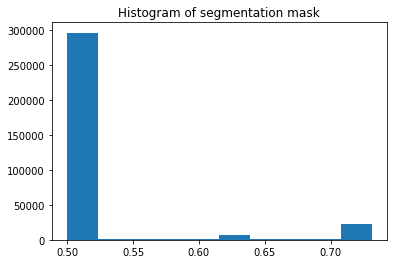

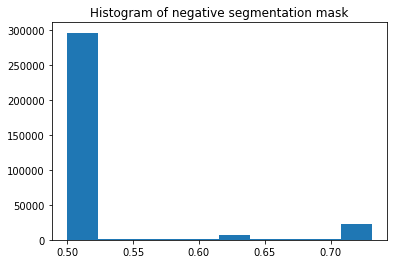

Metrics for segmentation: 
SE =  0.7362620541864381
SP =  0.9591027469866904
accuracy =  0.9415509259259259
AUC =  0.8476824005865642
Metrics for negative segmentation: 
SE =  0.9752279710987459
SP =  0.7761373613866216
accuracy =  0.9567750530478395
AUC =  0.8756826662426838


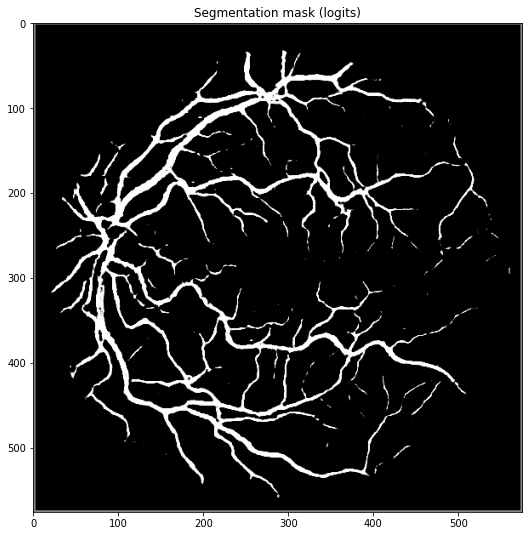

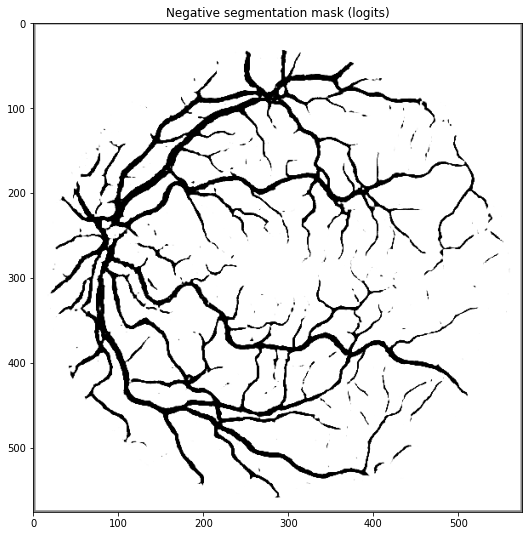

--------------------------------------------


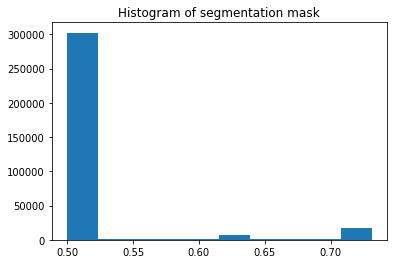

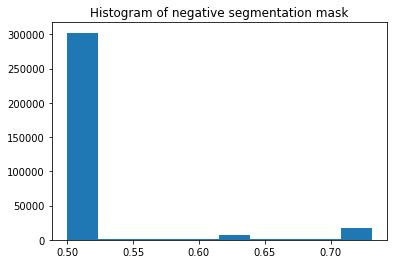

Metrics for segmentation: 
SE =  0.692591318027629
SP =  0.9615072165941528
accuracy =  0.945020134066358
AUC =  0.8270492673108909
Metrics for negative segmentation: 
SE =  0.9722373540856031
SP =  0.7314767282683093
accuracy =  0.955274040316358
AUC =  0.8518570411769563


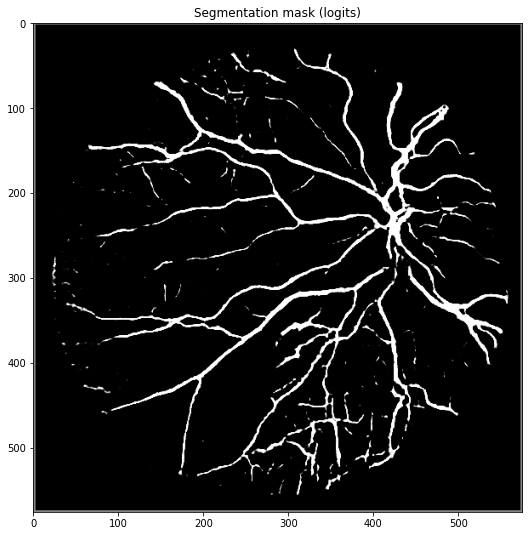

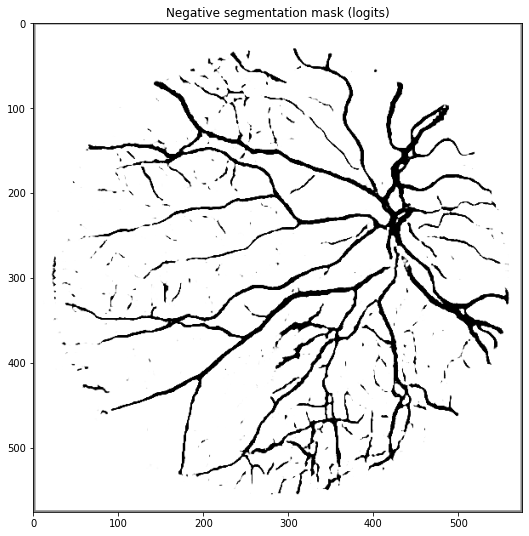

--------------------------------------------


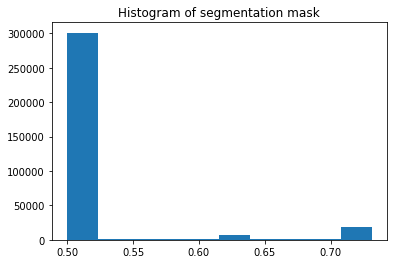

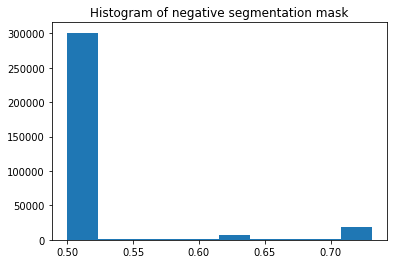

Metrics for segmentation: 
SE =  0.6221885961895591
SP =  0.968136558550106
accuracy =  0.9378164785879629
AUC =  0.7951625773698325
Metrics for negative segmentation: 
SE =  0.9847826160048146
SP =  0.6517334730591214
accuracy =  0.9502977912808642
AUC =  0.8182580445319683


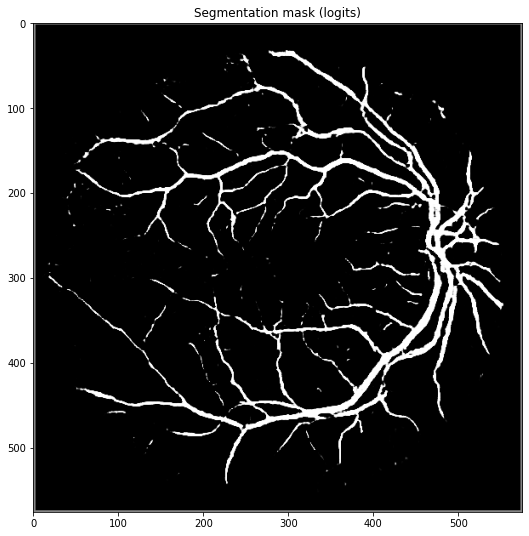

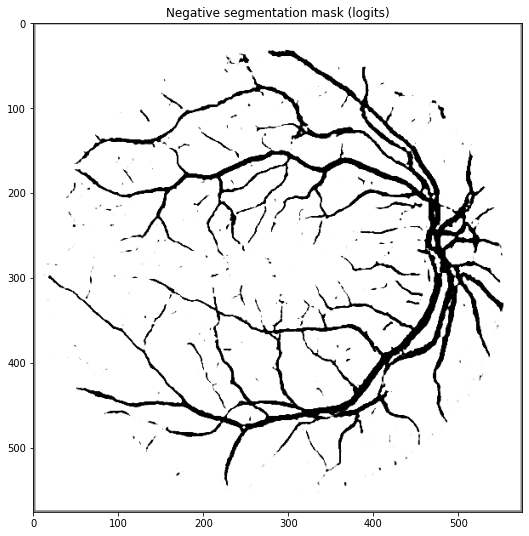

--------------------------------------------


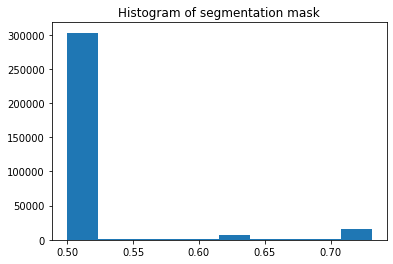

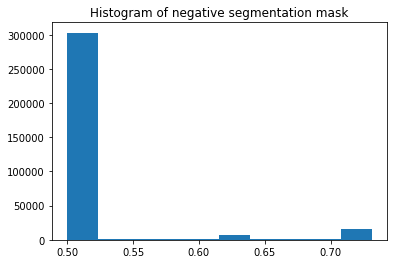

Metrics for segmentation: 
SE =  0.4821506094506595
SP =  0.9628368192796631
accuracy =  0.9194516782407407
AUC =  0.7224937143651613
Metrics for negative segmentation: 
SE =  0.9771316287942622
SP =  0.5364045840697873
accuracy =  0.9305344569830247
AUC =  0.7567681064320247


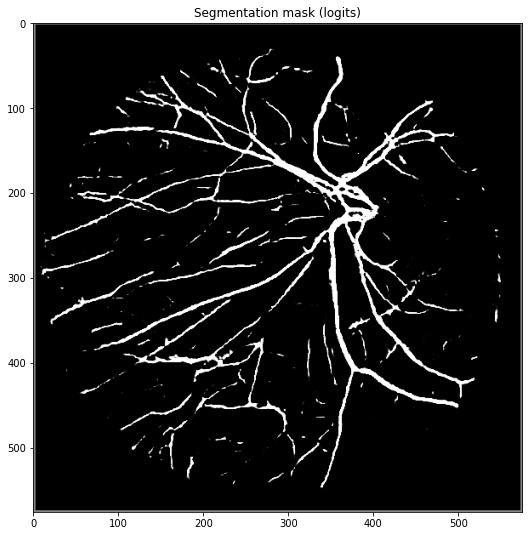

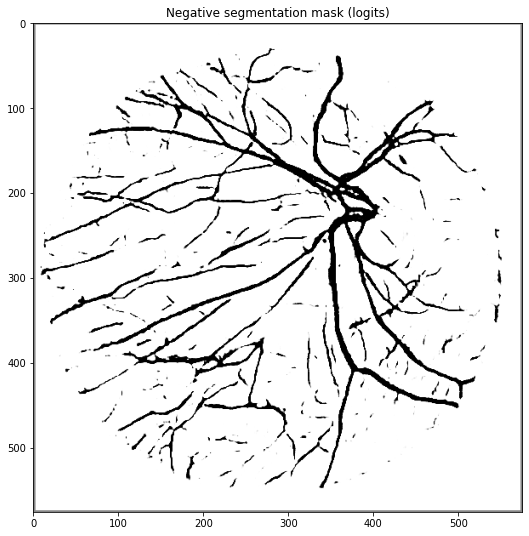

--------------------------------------------


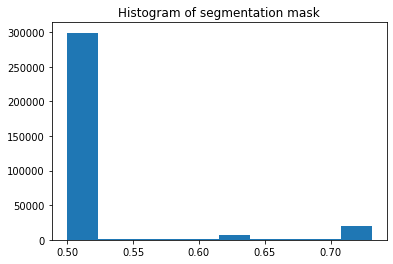

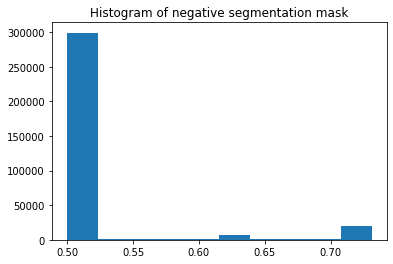

Metrics for segmentation: 
SE =  0.7097864978571148
SP =  0.9625909519721358
accuracy =  0.9432116849922839
AUC =  0.8361887249146254
Metrics for negative segmentation: 
SE =  0.9778330589517409
SP =  0.7424795047682784
accuracy =  0.9566333912037037
AUC =  0.8601562818600096


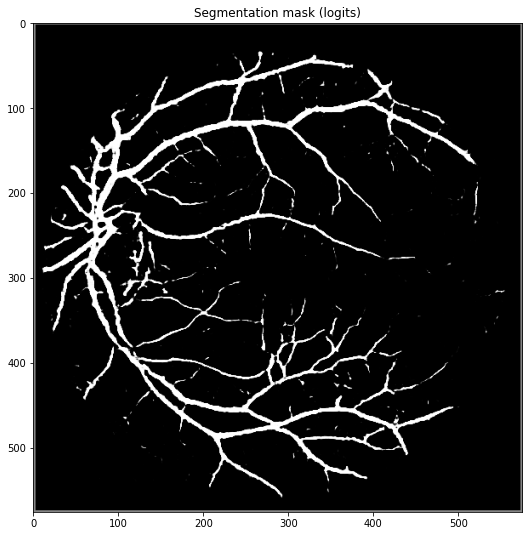

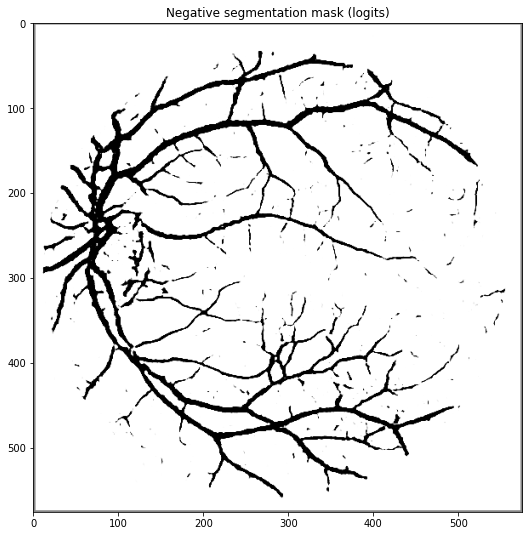

DRIVE, custom loss SE = 0.6486
DRIVE, custom loss SP = 0.9628
DRIVE, custom loss ACC = 0.9374
DRIVE, custom loss AUC = 0.8057


In [ ]:
## opracowanie wyników dla BCE lossu


ses = []
sps = []
accs = []
aucs = []

net_BCE_loss_drive = MSCNet(n_channels = 1, n_classes = 1, inner_sizes=(35, 66, 138, 282), output_size=576)
net_BCE_loss_drive.to(device)

dataset = DataLoaderDRIVE("data/drive")
train, test = torch.utils.data.random_split(dataset, [15,5], generator = torch.Generator().manual_seed(123))

train_loader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=1, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=1, num_workers=0, pin_memory=True, drop_last=True)

net_BCE_loss_drive.load_state_dict(torch.load("drive/MyDrive/wb/BCE_loss_drive_100.pth"))


for (image, mask_seg1, mask_seg2, mask_center) in test_loader:
  image = image.to(device)
  output_top, output_bot = net_BCE_loss_drive(image)


  mask_top = torch.squeeze(output_top.cpu().detach()).numpy()
  mask_bot = torch.squeeze(output_bot.cpu().detach()).numpy()

  mask_seg1 = torch.squeeze(mask_seg1.cpu().detach()).numpy()
  mask_seg2 = torch.squeeze(mask_seg2.cpu().detach()).numpy()

  print("--------------------------------------------")

  plt.hist(mask_top.flatten())
  plt.title("Histogram of segmentation mask")
  plt.show()

  plt.hist(mask_top.flatten())
  plt.title("Histogram of negative segmentation mask")
  plt.show()    


  ses.append(SE(mask_top, mask_seg1))
  sps.append(SP(mask_top, mask_seg1))
  accs.append(accuracy(mask_top, mask_seg1))
  aucs.append(AUC(mask_top, mask_seg1))

  print("Metrics for segmentation: ")
  print("SE = ",ses[-1])
  print("SP = ",sps[-1])
  print("accuracy = ",accs[-1])
  print("AUC = ", aucs[-1])



  print("Metrics for negative segmentation: ")
  print("SE = ",SE(mask_bot, mask_seg2))
  print("SP = ",SP(mask_bot, mask_seg2))
  print("accuracy = ",accuracy(mask_bot, mask_seg2))
  print("AUC = ", AUC(mask_bot, mask_seg2))




  plt.figure(figsize=(16,9))
  plt.imshow(mask_top, cmap="gray")
  plt.title("Segmentation mask (logits)")
  plt.show()

  plt.figure(figsize=(16,9))
  plt.imshow(mask_bot, cmap="gray")
  plt.title("Negative segmentation mask (logits)")
  plt.show()



print("DRIVE, custom loss SE = {:.4f}".format(sum(ses)/len(ses)))
print("DRIVE, custom loss SP = {:.4f}".format(sum(sps)/len(sps)))
print("DRIVE, custom loss ACC = {:.4f}".format(sum(accs)/len(accs)))
print("DRIVE, custom loss AUC = {:.4f}".format(sum(aucs)/len(aucs)))
